In [1]:
# for reading and validating data
import emeval.input.spec_details as eisd
import emeval.input.phone_view as eipv
import emeval.input.eval_view as eiev

In [2]:
# Visualization helpers
import emeval.viz.phone_view as ezpv
import emeval.viz.eval_view as ezev
import emeval.viz.geojson as ezgj
import pandas as pd

In [3]:
# Metrics helpers
import emeval.metrics.dist_calculations as emd

In [4]:
# For computation
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

In [5]:
import geopandas as gpd
import shapely as shp
import folium

In [6]:
DATASTORE_URL = "http://cardshark.cs.berkeley.edu"
AUTHOR_EMAIL = "shankari@eecs.berkeley.edu"
sd_la = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "unimodal_trip_car_bike_mtv_la")
sd_sj = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "car_scooter_brex_san_jose")
sd_ucb = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "train_bus_ebike_mtv_ucb")
sd_ucb_reroute = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "train_bus_ebike_sm_reroute_mtv_ucb")

About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1568862531}
response = <Response [200]>
Found 14 entries
After iterating over 14 entries, entry found
Found spec = Round trip car and bike trip in the South Bay
Evaluation ran from 2019-07-20T00:00:00-07:00 -> 2019-09-30T00:00:00-07:00
About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1568862532}
response = <Response [200]>
Found 14 entries
After iterating over 14 entries, entry found
Found spec = Multi-modal car scooter BREX trip to San Jose
Evaluation ran from 2019-07-20T00:00:00-07:00 -> 2019-09-30T00:00:00-07:00
About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1568862533}
response = <Response [200]>
Found 14 entries
After iterating over 14 entries, entry found
Fou

In [7]:
import importlib
importlib.reload(eisd)

<module 'emeval.input.spec_details' from '/Users/shankari/e-mission/e-mission-eval-public-data/emeval/input/spec_details.py'>

In [8]:
pv_la = eipv.PhoneView(sd_la)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 7 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564334117.295, 'end_time': 1564343045.9}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564351305.633, 'end_time': 1564360156.392}
response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565571034.93, 'end_time': 1565579009.992}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1567271203.764, 'end_time': 1567279427.961}
response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1567288614.642, 'end_time': 1567297340.9

response = <Response [200]>
Found 30 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564274276.021558, 'end_time': 1564282332.15351}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564334069.1049929, 'end_time': 1564343007.721693}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564351193.2504249, 'end_time': 1564360033.887364}
response = <Response [200]>
Found 12 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565570989.744656, 'end_time': 1565578915.798939}
response = <Response [200]>
Found 13 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1567271164.779111, 'end_time'

response = <Response [200]>
Found 1868 entries
Retrieved 1868 entries with timestamps [1564274558.354, 1564274558.727, 1564274564.028, 1564274565, 1564274566, 1564274567, 1564274568, 1564274569, 1564274570, 1564274571]...
About to retrieve data for ucb-sdb-android-2 from 1564280671.731 -> 1564282402.886
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1564280671.731, 'end_time': 1564282402.886}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280652]...
About to retrieve data for ucb-sdb-android-2 from 1564274304.968 -> 1564282402.886
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1564274304.968, 'end_time': 1564282402.886}
response = <Response [200]>
Found 1854 entries
Retrieved 1854 entries with timestamps [1564274558.727, 1564274565, 1564274566, 1564274567, 1564274568, 1564274569, 1564274570, 1564274571, 1564

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567296305.357]...
About to retrieve data for ucb-sdb-android-2 from 1567288623.391 -> 1567297357.197
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1567288623.391, 'end_time': 1567297357.197}
response = <Response [200]>
Found 2121 entries
Retrieved 2121 entries with timestamps [1567288912, 1567288913, 1567288914, 1567288915, 1567288916, 1567288917, 1567288918, 1567288919, 1567288920, 1567288921]...
About to retrieve data for ucb-sdb-android-2 from 1567296306.499 -> 1567297357.197
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1567296306.499, 'end_time': 1567297357.197}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567296305.357]...
About to retrieve data for ucb-sdb-android-3 from 1564274288.319 -> 1564282423.072
About t

response = <Response [200]>
Found 2159 entries
Retrieved 2159 entries with timestamps [1567271523.331, 1567271525, 1567271526, 1567271527, 1567271528, 1567271529, 1567271530, 1567271531, 1567271532, 1567271533]...
About to retrieve data for ucb-sdb-android-3 from 1567278441.249 -> 1567279372.922
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1567278441.249, 'end_time': 1567279372.922}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567278439.914]...
About to retrieve data for ucb-sdb-android-3 from 1567288638.503 -> 1567297394.837
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1567288638.503, 'end_time': 1567297394.837}
response = <Response [200]>
Found 2142 entries
Retrieved 2142 entries with timestamps [1567288849, 1567288908.399, 1567288910, 1567288911, 1567288912, 1567288913, 1567288914, 1567288915, 15672889

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564342965.9946914]...
About to retrieve data for ucb-sdb-ios-1 from 1564333996.5363011 -> 1564342975.472409
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/filtered_location'], 'start_time': 1564333996.5363011, 'end_time': 1564342975.472409}
response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-ios-1 from 1564351246.07085 -> 1564359997.0496612
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1564351246.07085, 'end_time': 1564359997.0496612}
response = <Response [200]>
Found 2214 entries
Retrieved 2214 entries with timestamps [1564351245.890137, 1564351251.02554, 1564351252.0238216, 1564351253.022198, 1564351254.0206494, 1564351255.0192485, 1564351257.0167162, 1564351258.0155365, 1564351259.0144756, 1564351261.0124218]...
About to retrieve data 

response = <Response [200]>
Found 1409 entries
Retrieved 1409 entries with timestamps [1564334605.343677, 1564334605.35634, 1564334608.9970002, 1564334609.9970446, 1564334610.9972146, 1564334611.9973783, 1564334612.9975357, 1564334613.9976838, 1564334614.9978194, 1564334615.9979572]...
About to retrieve data for ucb-sdb-ios-2 from 1564341004.17783 -> 1564342987.826695
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1564341004.17783, 'end_time': 1564342987.826695}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564341003.9938674]...
About to retrieve data for ucb-sdb-ios-2 from 1564351227.1936831 -> 1564360024.574613
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1564351227.1936831, 'end_time': 1564360024.574613}
response = <Response [200]>
Found 1479 entries
Retrieved 1479 entries with timestamps [1564351652.800541, 1564

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280497.4278622]...
About to retrieve data for ucb-sdb-ios-3 from 1564274265.212364 -> 1564282322.549677
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1564274265.212364, 'end_time': 1564282322.549677}
response = <Response [200]>
Found 164 entries
Retrieved 164 entries with timestamps [1564275493.428633, 1564275493.9934778, 1564275496.6995292, 1564275496.7031121, 1564279476.508539, 1564279477.556017, 1564279477.5692558, 1564279483.804306, 1564279491.801554, 1564279498.237344]...
About to retrieve data for ucb-sdb-ios-3 from 1564280497.5318642 -> 1564282322.549677
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1564280497.5318642, 'end_time': 1564282322.549677}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280497.4278622]...


response = <Response [200]>
Found 191 entries
Retrieved 191 entries with timestamps [1567288966.799432, 1567288970.999717, 1567288972.999673, 1567289002.9989781, 1567289006.998827, 1567289010.9986677, 1567289018.9983454, 1567289022.998178, 1567289026.9980106, 1567289035.9976294]...
About to retrieve data for ucb-sdb-ios-3 from 1567295578.123241 -> 1567297316.01469
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1567295578.123241, 'end_time': 1567297316.01469}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567295578.057469]...
About to retrieve data for ucb-sdb-ios-3 from 1567288581.6808891 -> 1567297316.01469
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1567288581.6808891, 'end_time': 1567297316.01469}
response = <Response [200]>
Found 177 entries
Retrieved 177 entries with timestamps [1567288970.999717, 1567288972.99

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564360156.019]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-1 from 1565571034.93 -> 1565579009.992
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565571034.93, 'end_time': 1565579009.992}
response = <Response [200]>
Found 696 entries
Retrieved 696 entries with timestamps [1565571047.229, 1565571047.265, 1565571060.105, 1565571073.261, 1565571086.122, 1565571098.288, 1565571110.936, 1565571124.113, 1565571136.955, 1565571149.982]...
About to retrieve data for ucb-sdb-android-1 from 1565579001.09 -> 1565579009.992
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565579001.09, 'end_time': 1565579009.992}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565579001.09]..

response = <Response [200]>
Found 87 entries
Retrieved 87 entries with timestamps [1564274799.255, 1564274844.391, 1564274876.142, 1564274908.298, 1564274939.241, 1564274972.776, 1564275004.816, 1564275036.774, 1564275054.166, 1564275085.157]...
About to retrieve data for ucb-sdb-android-3 from 1564280654.09 -> 1564282423.072
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1564280654.09, 'end_time': 1564282423.072}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280654.09]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1564334097.33 -> 1564343025.406
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1564334097.33, 'end_time': 1564343025.406}
response = <Response [200]>
Found 88 entries
Retrieved 88 entries with timestamps [1564334508.801, 1

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567279346.569]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-4 from 1567288647.374 -> 1567297374.928
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/motion_activity'], 'start_time': 1567288647.374, 'end_time': 1567297374.928}
response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
motion activity has not been processed, copying write_ts -> ts
Processing data for ios phones
About to retrieve data for ucb-sdb-ios-1 from 1564274247.275763 -> 1564282290.729272
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1564274247.275763, 'end_time': 1564282290.729272}
response = <Response [200]>
Found 517 entries
Retrieved 517 entries with timestamps [1564274270.7468784, 1564274273.2592103, 1564274323.4081597, 1564274353.5

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564359604.1259458]...
About to retrieve data for ucb-sdb-ios-2 from 1565570980.468295 -> 1565578894.831118
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565570980.468295, 'end_time': 1565578894.831118}
response = <Response [200]>
Found 287 entries
Retrieved 287 entries with timestamps [1565570996.1814125, 1565571071.1814132, 1565571081.181413, 1565571086.1814132, 1565571176.1814127, 1565571186.1814127, 1565571191.1814127, 1565571196.1814127, 1565571216.1814125, 1565571246.1814132]...
About to retrieve data for ucb-sdb-ios-2 from 1565578879.3066506 -> 1565578894.831118
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565578879.3066506, 'end_time': 1565578894.831118}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565578879.3066506]...

response = <Response [200]>
Found 243 entries
Retrieved 243 entries with timestamps [1564274288.6357331, 1564274293.6357331, 1564274343.6357334, 1564274438.6357336, 1564274568.6357331, 1564274603.6357336, 1564274673.6357334, 1564274758.684916, 1564274797.4722486, 1564274835.013862]...
About to retrieve data for ucb-sdb-ios-4 from 1564282332.075515 -> 1564282332.15351
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564282332.075515, 'end_time': 1564282332.15351}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564282332.075515]...
About to retrieve data for ucb-sdb-ios-4 from 1564334069.1049929 -> 1564343007.721693
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564334069.1049929, 'end_time': 1564343007.721693}
response = <Response [200]>
Found 192 entries
Retrieved 192 entries with timestamps [1564334156.9572866, 15

response = <Response [200]>
Found 6 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1564274288.319, 'end_time': 1564282423.072}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1564334097.33, 'end_time': 1564343025.406}
response = <Response [200]>
Found 12 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1564351277.477, 'end_time': 1564360134.181}
response = <Response [200]>
Found 6 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition']

response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1564334069.1049929, 'end_time': 1564343007.721693}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1564351193.2504249, 'end_time': 1564360033.887364}
response = <Response [200]>
Found 10 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565570989.744656, 'end_time': 1565578915.798939}
response = <Response [200]>
Found 10 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transi

In [9]:
pv_sj = eipv.PhoneView(sd_sj)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1563896743.139, 'end_time': 1563917431.489}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564244087.215, 'end_time': 1564263878.59}
response = <Response [200]>
Found 10 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565026006.793, 'end_time': 1565050217.383}
response = <Response [200]>
Found 12 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565116007.631, 'end_time': 1565140213.84}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565194658.17, 'end_time': 1565217816

response = <Response [200]>
Found 43 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1563821424.2870421, 'end_time': 1563846221.430156}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1563896726.293744, 'end_time': 1563917689.911433}
response = <Response [200]>
Found 15 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564244069.2081819, 'end_time': 1564263869.479578}
response = <Response [200]>
Found 16 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565025999.709025, 'end_time': 1565050202.3005052}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565115979.7075438, 'end_ti

response = <Response [200]>
Found 7073 entries
Retrieved 7073 entries with timestamps [1563821666.739, 1563821668.84, 1563821671.404, 1563821673, 1563821674, 1563821675, 1563821676, 1563821677, 1563821678, 1563821679]...
About to retrieve data for ucb-sdb-android-2 from 1563846294.501 -> 1563846294.773
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563846294.501, 'end_time': 1563846294.773}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563843196]...
About to retrieve data for ucb-sdb-android-2 from 1563821451.365 -> 1563846294.773
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1563821451.365, 'end_time': 1563846294.773}
response = <Response [200]>
Found 7067 entries
Retrieved 7067 entries with timestamps [1563821668.84, 1563821671.404, 1563821673, 1563821674, 1563821675, 1563821676, 1563821677, 1563821678, 15

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565216017.932]...
About to retrieve data for ucb-sdb-android-2 from 1565194646.726 -> 1565217853.529
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1565194646.726, 'end_time': 1565217853.529}
response = <Response [200]>
Found 7218 entries
Retrieved 7218 entries with timestamps [1565194907.112, 1565194913, 1565194914, 1565194915, 1565194916, 1565194917, 1565194918, 1565194919, 1565194920, 1565194921]...
About to retrieve data for ucb-sdb-android-2 from 1565217852.659 -> 1565217853.529
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1565217852.659, 'end_time': 1565217853.529}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565216012.932]...
About to retrieve data for ucb-sdb-android-3 from 1563821466.019 -> 1563846343.356
Abo

response = <Response [200]>
Found 6079 entries
Retrieved 6079 entries with timestamps [1565116058.369, 1565116062.181, 1565116067.966, 1565116075.631, 1565116080.689, 1565116087.501, 1565116096.527, 1565116105.79, 1565116113.564, 1565116118.668]...
About to retrieve data for ucb-sdb-android-3 from 1565140277.976 -> 1565140296.074
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1565140277.976, 'end_time': 1565140296.074}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140279]...
About to retrieve data for ucb-sdb-android-3 from 1565194636.421 -> 1565217890.224
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1565194636.421, 'end_time': 1565217890.224}
response = <Response [200]>
Found 5253 entries
Retrieved 5253 entries with timestamps [1565194898.051, 1565194898.051, 1565194904.934, 1565194909.939, 1565194917.03

response = <Response [200]>
Found 5722 entries
Retrieved 5722 entries with timestamps [1563896678.561882, 1563896681.53107, 1563896682.0100274, 1563896683.009514, 1563896684.0088549, 1563896687.0071504, 1563896688.006662, 1563896690.0057957, 1563896691.0053968, 1563896692.0050101]...
About to retrieve data for ucb-sdb-ios-1 from 1563917428.5349998 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1563917428.5349998, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563917428.450831]...
About to retrieve data for ucb-sdb-ios-1 from 1563896678.241638 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/filtered_location'], 'start_time': 1563896678.241638, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve dat

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563915825.4298968]...
About to retrieve data for ucb-sdb-ios-2 from 1563896695.465279 -> 1563917644.283163
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1563896695.465279, 'end_time': 1563917644.283163}
response = <Response [200]>
Found 4214 entries
Retrieved 4214 entries with timestamps [1563897071.5372581, 1563897071.539604, 1563897077.92377, 1563897085.836732, 1563897085.9985485, 1563897086.9985986, 1563897091.99877, 1563897092.9987903, 1563897093.998808, 1563897094.9988203]...
About to retrieve data for ucb-sdb-ios-2 from 1563915825.6501431 -> 1563917644.283163
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1563915825.6501431, 'end_time': 1563917644.283163}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563915825.4298968]...

response = <Response [200]>
Found 1021 entries
Retrieved 1021 entries with timestamps [1563821693.67274, 1563821694.628164, 1563821694.6408582, 1563821701.492943, 1563821707.916102, 1563821714.441504, 1563821720.929595, 1563821727.351037, 1563821733.773116, 1563821740.1933188]...
About to retrieve data for ucb-sdb-ios-3 from 1563842661.888513 -> 1563846186.997916
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1563842661.888513, 'end_time': 1563846186.997916}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563842661.7784162]...
About to retrieve data for ucb-sdb-ios-3 from 1563821405.729749 -> 1563846186.997916
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1563821405.729749, 'end_time': 1563846186.997916}
response = <Response [200]>
Found 682 entries
Retrieved 682 entries with timestamps [1563821694.6408582, 1563821701.

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140175.999116]...
About to retrieve data for ucb-sdb-ios-3 from 1565194722.424724 -> 1565217784.212751
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1565194722.424724, 'end_time': 1565217784.212751}
response = <Response [200]>
Found 971 entries
Retrieved 971 entries with timestamps [1565194974.483992, 1565195385.244978, 1565195388.503786, 1565195390.6859698, 1565195393.0103195, 1565195394.009594, 1565195395.0088694, 1565195397.007664, 1565195399.0066142, 1565195401.0057068]...
About to retrieve data for ucb-sdb-ios-3 from 1565214712.10034 -> 1565217784.212751
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1565214712.10034, 'end_time': 1565217784.212751}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565214711.9975872]...
About to retrieve data

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564263875.826]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-1 from 1565026006.793 -> 1565050217.383
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565026006.793, 'end_time': 1565050217.383}
response = <Response [200]>
Found 733 entries
Retrieved 733 entries with timestamps [1565026007.617, 1565026007.643, 1565026019.694, 1565026019.727, 1565026032.668, 1565026045.749, 1565026058.634, 1565026071.786, 1565026084.795, 1565026098.289]...
About to retrieve data for ucb-sdb-android-1 from 1565050204.65 -> 1565050217.383
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565050204.65, 'end_time': 1565050217.383}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565050204.65]

response = <Response [200]>
Found 231 entries
Retrieved 231 entries with timestamps [1563821738.499, 1563821779.842, 1563821837.62, 1563821842.841, 1563821877.531, 1563821908.583, 1563821930.869, 1563821962.319, 1563821994.516, 1563822047.615]...
About to retrieve data for ucb-sdb-android-3 from 1563842914.109 -> 1563846343.356
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1563842914.109, 'end_time': 1563846343.356}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563842914.109]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1563896782.972 -> 1563917505.1820002
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1563896782.972, 'end_time': 1563917505.1820002}
response = <Response [200]>
Found 233 entries
Retrieved 233 entries with timestamps [1

response = <Response [200]>
Found 900 entries
Retrieved 900 entries with timestamps [1563821395.9146056, 1563821405.3125677, 1563821405.6250775, 1563821501.322351, 1563821503.8291569, 1563821656.8780947, 1563821699.5039434, 1563821704.5208488, 1563821714.5498688, 1563821739.6214435]...
About to retrieve data for ucb-sdb-ios-1 from 1563846085.4912872 -> 1563846150.16837
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1563846085.4912872, 'end_time': 1563846150.16837}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563846085.4912872]...
About to retrieve data for ucb-sdb-ios-1 from 1563896678.241638 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1563896678.241638, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 543 entries
Retrieved 543 entries with timestamps [1563896727.012053,

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565050092.7069602]...
About to retrieve data for ucb-sdb-ios-2 from 1565115934.904733 -> 1565140080.093207
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565115934.904733, 'end_time': 1565140080.093207}
response = <Response [200]>
Found 444 entries
Retrieved 444 entries with timestamps [1565115942.1383767, 1565115944.637134, 1565115988.9834712, 1565116098.9834712, 1565116103.9834714, 1565116176.9178183, 1565116181.917818, 1565116231.917819, 1565116426.917818, 1565116431.9178183]...
About to retrieve data for ucb-sdb-ios-2 from 1565140011.1331575 -> 1565140080.093207
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565140011.1331575, 'end_time': 1565140080.093207}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140011.1331575]...
Ab

response = <Response [200]>
Found 255 entries
Retrieved 255 entries with timestamps [1563896733.0620825, 1563896750.5781207, 1563896760.5781207, 1563896795.5781212, 1563896815.5781212, 1563896875.5781207, 1563896890.5781207, 1563896910.5781202, 1563896930.5781205, 1563896935.5781207]...
About to retrieve data for ucb-sdb-ios-4 from 1563916932.9843733 -> 1563917689.911433
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1563916932.9843733, 'end_time': 1563917689.911433}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563916932.9843733]...
About to retrieve data for ucb-sdb-ios-4 from 1564244069.2081819 -> 1564263869.479578
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564244069.2081819, 'end_time': 1564263869.479578}
response = <Response [200]>
Found 388 entries
Retrieved 388 entries with timestamps [1564244070.7108

response = <Response [200]>
Found 7 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1565026028.417, 'end_time': 1565050275.592}
response = <Response [200]>
Found 7 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1565116061.463, 'end_time': 1565140296.074}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1565194636.421, 'end_time': 1565217890.224}
response = <Response [200]>
Found 5 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['statemachine/transition']

response = <Response [200]>
Found 18 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565115979.7075438, 'end_time': 1565140156.261787}
response = <Response [200]>
Found 18 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565194696.183675, 'end_time': 1565217805.7350268}
response = <Response [200]>
Found 16 entries
transition has not been processed, creating ts -> fmt_time
-------------------- About to select trip specific ranges --------------------
Filling label ucb-sdb-android-1 for OS android
Filling label ucb-sdb-android-2 for OS android
Filling label ucb-sdb-android-3 for OS android
Filling label ucb-sdb-android-4 for OS android
Filling label ucb-sdb-ios-1 for OS ios
Filling label ucb-sdb-ios-2 for OS ios
Filling label

In [10]:
pv_ucb = eipv.PhoneView(sd_ucb)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 72 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 60 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 60 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 24 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564067115.279, 'end_time': 1564111993.08}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564153794.979, 'end_time': 1564198662.867}
response = <Response [200]>
Found 22 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 37 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564067129.194, 'end_time': 1564111993.08}
response = <Response [200]>
Found 30 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564153809.884, 'end_time': 15641986

response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-android-2 from 1563979684.205 -> 1564026016.571
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 14149 entries
Retrieved 14149 entries with timestamps [1563979683.523, 1563979683.523, 1563979686.541, 1563979691, 1563979692, 1563979693, 1563979694, 1563979695, 1563979696, 1563979697]...
About to retrieve data for ucb-sdb-android-2 from 1564021868.503 -> 1564026016.571
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1564021868.503, 'end_time': 1564026016.571}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564021794]...
About to retrieve data for ucb-sdb-android-2 from 1563979684.205 -> 1564026016.571
About to retrieve messages us

response = <Response [200]>
Found 875 entries
Retrieved 875 entries with timestamps [1564154023.987, 1564154023.987, 1564154050, 1564154055, 1564154088.096, 1564154119.23, 1564154150, 1564154180, 1564154211, 1564154241]...
About to retrieve data for ucb-sdb-android-3 from 1564196589.192 -> 1564198700.606
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1564196589.192, 'end_time': 1564198700.606}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564196587.808]...
About to retrieve data for ucb-sdb-android-3 from 1564153836.582 -> 1564198700.606
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1564153836.582, 'end_time': 1564198700.606}
response = <Response [200]>
Found 721 entries
Retrieved 721 entries with timestamps [1564154023.987, 1564154050, 1564154055, 1564154088.096, 1564154119.23, 1564154150, 1564154180, 156415

response = <Response [200]>
Found 11052 entries
Retrieved 11052 entries with timestamps [1563980042.8723888, 1563980044.385489, 1563980046.1162372, 1563980047.1293101, 1563980047.999834, 1563980048.9998174, 1563980049.9998074, 1563980050.9997978, 1563980051.9997861, 1563980053.999772]...
About to retrieve data for ucb-sdb-ios-2 from 1564023575.128773 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1564023575.128773, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564023574.9863236]...
About to retrieve data for ucb-sdb-ios-2 from 1563979628.6823301 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1563979628.6823301, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 10525 entries
Retrieved 10525 entries with timestamps [1563980044.385489

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564109946.124861]...
About to retrieve data for ucb-sdb-ios-3 from 1564153754.09529 -> 1564198601.973415
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1564153754.09529, 'end_time': 1564198601.973415}
response = <Response [200]>
Found 2321 entries
Retrieved 2321 entries with timestamps [1564117209.9645019, 1564154572.964088, 1564154849.341601, 1564155206.677164, 1564155222.038831, 1564155229.005299, 1564155244.811119, 1564155251.220082, 1564155273.199754, 1564155282.301773]...
About to retrieve data for ucb-sdb-ios-3 from 1564198595.263564 -> 1564198601.973415
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1564198595.263564, 'end_time': 1564198601.973415}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564198595.1684551]...
About to retrieve data f

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564107892.911]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-2 from 1564153809.884 -> 1564198662.867
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1564153809.884, 'end_time': 1564198662.867}
response = <Response [200]>
Found 1587 entries
Retrieved 1587 entries with timestamps [1564154036.632, 1564154049, 1564154057.113, 1564154065.3, 1564154078.39, 1564154091.102, 1564154103.719, 1564154116.522, 1564154125.219, 1564154134.269]...
About to retrieve data for ucb-sdb-android-2 from 1564193889.939 -> 1564198662.867
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1564193889.939, 'end_time': 1564198662.867}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564193889.939]..

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564198468.2332456]...
About to retrieve data for ucb-sdb-ios-2 from 1563979628.6823301 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1563979628.6823301, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 927 entries
Retrieved 927 entries with timestamps [1563979677.622645, 1563979767.6226444, 1563979772.6226444, 1563979787.6226444, 1563980990.0595727, 1563980993.8012114, 1563981015.9809394, 1563981085.6387854, 1563981089.7018366, 1563981093.760253]...
About to retrieve data for ucb-sdb-ios-2 from 1564026145.1770449 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1564026145.1770449, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564026145.1770449]..

response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['statemachine/transition'], 'start_time': 1564067115.279, 'end_time': 1564111993.08}
response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['statemachine/transition'], 'start_time': 1564153794.979, 'end_time': 1564198662.867}
response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 21 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition']

In [11]:
pv_ucb_reroute = eipv.PhoneView(sd_ucb_reroute)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1567321200, 'end_time': 1569826800}
response = <Response [200]>
Found 8 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1567321200, 'end_time': 1569826800}
response = <Response [200]>
Found 8 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1567321200, 'end_time': 1569826800}
response = <Response [200]>
Found 8 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/eva

response = <Response [200]>
Found 21 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1568214664.759, 'end_time': 1568259367.23}
response = <Response [200]>
Found 21 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1568732827.102, 'end_time': 1568775432.33}
response = <Response [200]>
Found 19 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1568128292.816, 'end_time': 1568171423.307}
response = <Response [200]>
Found 32 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1568214683.663, 'end_time': 1568259367.23}
response = <Response [200]>
Found 25 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1568732838.865, 'end_time': 156877545

response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-android-2 from 1568128292.816 -> 1568171423.307
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1568128292.816, 'end_time': 1568171423.307}
response = <Response [200]>
Found 12323 entries
Retrieved 12323 entries with timestamps [1568128293.495, 1568128293.495, 1568128295.417, 1568128300.537, 1568128305.58, 1568128310.629, 1568128315.679, 1568128320.785, 1568128325.84, 1568128330.889]...
About to retrieve data for ucb-sdb-android-2 from 1568169577.077 -> 1568171423.307
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1568169577.077, 'end_time': 1568171423.307}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568169576.259]...
About to retrieve data for ucb-sdb-android-2 from 1568128292.816 -> 1568171423.307

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568259381]...
About to retrieve data for ucb-sdb-android-3 from 1568732848.143 -> 1568775473.326
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1568732848.143, 'end_time': 1568775473.326}
response = <Response [200]>
Found 6930 entries
Retrieved 6930 entries with timestamps [1568732847.721, 1568732847.721, 1568732849.254, 1568732860.245, 1568732868.085, 1568732873.249, 1568732878.288, 1568732883.355, 1568732888.395, 1568732896.124]...
About to retrieve data for ucb-sdb-android-3 from 1568775472.624 -> 1568775473.326
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1568775472.624, 'end_time': 1568775473.326}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568775472.141]...
About to retrieve data for ucb-sdb-android-3 from 1568732848.143 -> 1568

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568171383.9980478]...
About to retrieve data for ucb-sdb-ios-2 from 1568128234.2934499 -> 1568171406.342128
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1568128234.2934499, 'end_time': 1568171406.342128}
response = <Response [200]>
Found 7926 entries
Retrieved 7926 entries with timestamps [1568128608.704241, 1568128608.704241, 1568128611.3965454, 1568128613.00422, 1568128614.0039368, 1568128615.0036702, 1568128617.0031762, 1568128618.0029507, 1568128619.00274, 1568128620.002542]...
About to retrieve data for ucb-sdb-ios-2 from 1568171384.342057 -> 1568171406.342128
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1568171384.342057, 'end_time': 1568171406.342128}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568171383.9980478]...

response = <Response [200]>
Found 3120 entries
Retrieved 3120 entries with timestamps [1568733090.4660358, 1568733231.789537, 1568733236.933502, 1568733240.0436425, 1568733266.0061285, 1568733287.998708, 1568733306.9964137, 1568733326.9950864, 1568733352.9937966, 1568733374.992795]...
About to retrieve data for ucb-sdb-ios-3 from 1568775392.084474 -> 1568775397.909452
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1568775392.084474, 'end_time': 1568775397.909452}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568775391.9997694]...
About to retrieve data for ucb-sdb-ios-3 from 1568732800.530198 -> 1568775397.909452
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1568732800.530198, 'end_time': 1568775397.909452}
response = <Response [200]>
Found 2792 entries
Retrieved 2792 entries with timestamps [1568733231.789537, 15687

response = <Response [200]>
Found 1486 entries
Retrieved 1486 entries with timestamps [1568733033.138, 1568733046.84, 1568733062.798, 1568733079.658, 1568733089.731, 1568733099.868, 1568733116.628, 1568733128.374, 1568733144.145, 1568733160.971]...
About to retrieve data for ucb-sdb-android-2 from 1568773380.898 -> 1568775451.963
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1568773380.898, 'end_time': 1568775451.963}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568773380.898]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1568128304.271 -> 1568171480.428
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1568128304.271, 'end_time': 1568171480.428}
response = <Response [200]>
Found 1994 entries
Retrieved 1994 entries with timestamps [15681

response = <Response [200]>
Found 640 entries
Retrieved 640 entries with timestamps [1568214668.6757827, 1568214748.675783, 1568215663.8944585, 1568215673.8944583, 1568215688.8944592, 1568215693.8944592, 1568215808.8944588, 1568215975.12434, 1568215992.6017208, 1568216148.9740565]...
About to retrieve data for ucb-sdb-ios-2 from 1568259292.0169773 -> 1568259320.4247599
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1568259292.0169773, 'end_time': 1568259320.4247599}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568259292.0169773]...
About to retrieve data for ucb-sdb-ios-2 from 1568732781.243727 -> 1568775365.402838
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1568732781.243727, 'end_time': 1568775365.402838}
response = <Response [200]>
Found 760 entries
Retrieved 760 entries with timestamps [1568732783.287293,

response = <Response [200]>
Found 11 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1568732838.865, 'end_time': 1568775451.963}
response = <Response [200]>
Found 20 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1568128304.271, 'end_time': 1568171480.428}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1568214696.732, 'end_time': 1568259402.365}
response = <Response [200]>
Found 7 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition

In [12]:
import emeval.analysed.phone_view as eapv
importlib.reload(eapv)

<module 'emeval.analysed.phone_view' from '/Users/shankari/e-mission/e-mission-eval-public-data/emeval/analysed/phone_view.py'>

In [13]:
av_la = eapv.create_analysed_view(pv_la, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")
av_sj = eapv.create_analysed_view(pv_sj, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")
av_ucb = eapv.create_analysed_view(pv_ucb, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")
av_ucb_reroute = eapv.create_analysed_view(pv_ucb_reroute, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")

Finished copying unimodal_trip_car_bike_mtv_la, starting overwrite
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1563606000, 'end_time': 1568863217}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1568863217}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1568863218}
response = <Response [200]>
Found 0 en

response = <Response [200]>
Found 5626 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1568863225}
response = <Response [200]>
Found 79 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1568863225}
response = <Response [200]>
Found 229 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 2
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration

response = <Response [200]>
Found 6064 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1568863229}
response = <Response [200]>
Found 43 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1568863229}
response = <Response [200]>
Found 270 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_0 HAHFDC v/s MAHFDC HAHFDC_0 2
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval

Finished copying car_scooter_brex_san_jose, starting overwrite
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1563606000, 'end_time': 1568863246}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1568863246}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1568863246}
response = <Response [200]>
Found 0 entrie

response = <Response [200]>
Found 5626 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1568863251}
response = <Response [200]>
Found 79 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1568863252}
response = <Response [200]>
Found 229 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 2
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration

response = <Response [200]>
Found 6064 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1568863255}
response = <Response [200]>
Found 43 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1568863255}
response = <Response [200]>
Found 270 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_0 HAHFDC v/s MAHFDC HAHFDC_0 2
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval

Finished copying train_bus_ebike_mtv_ucb, starting overwrite
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1563260400, 'end_time': 1568863273}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1568863273}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563260400, 'end_time': 1568863273}
response = <Response [200]>
Found 0 entries


response = <Response [200]>
Found 6064 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1568863282}
response = <Response [200]>
Found 43 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563260400, 'end_time': 1568863282}
response = <Response [200]>
Found 270 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_0 HAHFDC v/s MAHFDC HAHFDC_0 3
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval

response = <Response [200]>
Found 5200 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1567321200, 'end_time': 1568863306}
response = <Response [200]>
Found 82 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_section'], 'start_time': 1567321200, 'end_time': 1568863306}
response = <Response [200]>
Found 259 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_0 HAHFDC v/s MAHFDC HAHFDC_0 3
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration

response = <Response [200]>
Found 6064 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1567321200, 'end_time': 1568863312}
response = <Response [200]>
Found 43 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_section'], 'start_time': 1567321200, 'end_time': 1568863312}
response = <Response [200]>
Found 270 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAHFDC_0 HAHFDC v/s HAMFDC HAHFDC_0 3
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval

In [14]:
[se["metadata"]["write_fmt_time"] for se in av_sj.map()["ios"]["ucb-sdb-ios-2"]["evaluation_ranges"][0]["sensed_trip_ranges"]]

['2019-09-18T10:43:23.267244-07:00', '2019-09-18T10:43:24.197055-07:00']

### Validate distance calculations

Our x,y coordinates are in degrees (lon, lat). So when we calculate the distance between two points, it is also in degrees. In order for this to be meaningful, we need to convert it to a regular distance metric such as meters.

This is a complicated problem in general because our distance calculation applies 2-D spatial operations to a 3-D curved space. However, as documented in the shapely documentation, since our areas of interest are small, we can use a 2-D approximation and get reasonable results.

In order to get distances from degree-based calculations, we can use the following options:
- perform the calculations in degrees and then convert them to meters. As an approximation, we can use the fact that 360 degrees represents the circumference of the earth. Therefore `dist = degree_dist * (C/360)`
- convert degrees to x,y coordinates using utm (https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system) and then calculate the distance
- since we calculate the distance from the ground truth linestring, calculate the closest ground truth point in (lon,lat) and then use the haversine formula (https://en.wikipedia.org/wiki/Haversine_formula) to calculate the distance between the two points

Let us quickly all three calculations for three selected test cases and:
- check whether they are largely consistent
- compare with other distance calculators to see which are closer

### Results and method choice

We find that the `manual_utm` and `project` methods are pretty consistent, and are significantly different from the `circumference` method. The `circumference` method appears to be consistently greater than the other two and the difference appears to be around 25%. The manual checks also appear to be closer to the `manual_utm` and `project` values. The `manual_utm` and `project` values are consistently within ~ 5% of each other, so we could really use either one.

**We will use the utm approach** since it is correct, is consistent with the shapely documentation (https://shapely.readthedocs.io/en/stable/manual.html#coordinate-systems) and applicable to operations beyond distance calculation

> Even though the Earth is not flat – and for that matter not exactly spherical – there are many analytic problems that can be approached by transforming Earth features to a Cartesian plane, applying tried and true algorithms, and then transforming the results back to geographic coordinates. This practice is as old as the tradition of accurate paper maps.

## Spatial error calculation

In [15]:
def get_spatial_errors(pv):
    spatial_error_df = pd.DataFrame()
    
    for phone_os, phone_map in pv.map().items():
        for phone_label, phone_detail_map in phone_map.items():
            for (r_idx, r) in enumerate(phone_detail_map["evaluation_ranges"]):
                run_errors = []
                for (tr_idx, tr) in enumerate(r["evaluation_trip_ranges"]):
                    trip_errors = []
                    for (sr_idx, sr) in enumerate(tr["evaluation_section_ranges"]):
                        # This is a Shapely LineString
                        
                        section_gt_leg = pv.spec_details.get_ground_truth_for_leg(tr["trip_id_base"], sr["trip_id_base"])
                        section_gt_shapes = gpd.GeoSeries(eisd.SpecDetails.get_shapes_for_leg(section_gt_leg))
                        if len(section_gt_shapes) == 1:
                            print("No ground truth route for %s %s, must be polygon, skipping..." % (tr["trip_id_base"], sr["trip_id_base"]))
                            assert section_gt_leg["type"] != "TRAVEL", "For %s, %s, %s, %s, %s found type %s" % (phone_os, phone_label, r_idx, tr_idx, sr_idx, section_gt_leg["type"])
                            continue
                        if len(sr['location_df']) == 0:
                            print("No sensed locations found, role = %s skipping..." % (r["eval_role_base"]))
                            # assert r["eval_role_base"] == "power_control", "Found no locations for %s, %s, %s, %s, %s" % (phone_os, phone_label, r_idx, tr_idx, sr_idx)
                            continue
                            
                        print("Processing travel leg %s, %s, %s, %s, %s" %
                              (phone_os, phone_label, r["eval_role_base"], tr["trip_id_base"], sr["trip_id_base"]))
                        # This is a GeoDataFrame
                        section_geo_df = emd.to_geo_df(sr["location_df"])
                        
                        # After this point, everything is in UTM so that 2-D inside/filtering operations work
                        utm_section_geo_df = emd.to_utm_df(section_geo_df)
                        utm_section_gt_shapes = section_gt_shapes.apply(lambda s: shp.ops.transform(emd.to_utm_coords, s))
                        filtered_us_gpdf = emd.filter_geo_df(utm_section_geo_df, utm_section_gt_shapes.loc["start_loc":"end_loc"])
                        filtered_gt_linestring = emd.filter_ground_truth_linestring(utm_section_gt_shapes)
                        meter_dist = filtered_us_gpdf.geometry.distance(filtered_gt_linestring)
                        ne = len(meter_dist)
                        curr_spatial_error_df = gpd.GeoDataFrame({"error": meter_dist,
                                                                  "ts": section_geo_df.ts,
                                                                  "geometry": section_geo_df.geometry,
                                                                  "phone_os": np.repeat(phone_os, ne),
                                                                  "phone_label": np.repeat(phone_label, ne),
                                                                  "role": np.repeat(r["eval_role_base"], ne),
                                                                  "timeline": np.repeat(pv.spec_details.CURR_SPEC_ID, ne), 
                                                                  "run": np.repeat(r_idx, ne),
                                                                  "trip_id": np.repeat(tr["trip_id_base"], ne),
                                                                  "section_id": np.repeat(sr["trip_id_base"], ne)})
                        spatial_error_df = pd.concat([spatial_error_df, curr_spatial_error_df], axis="index")
    return spatial_error_df

In [16]:
spatial_errors_df = pd.DataFrame()
spatial_errors_df = pd.concat([spatial_errors_df, get_spatial_errors(av_la)], axis="index")
spatial_errors_df = pd.concat([spatial_errors_df, get_spatial_errors(av_sj)], axis="index")
spatial_errors_df = pd.concat([spatial_errors_df, get_spatial_errors(av_ucb)], axis="index")
spatial_errors_df = pd.concat([spatial_errors_df, get_spatial_errors(av_ucb_reroute)], axis="index")

No ground truth route for suburb_city_driving_weekend walk_start, must be polygon, skipping...
No sensed locations found, role = accuracy_control skipping...
No ground truth route for suburb_city_driving_weekend walk_end, must be polygon, skipping...
No ground truth route for suburb_bicycling walk_start, must be polygon, skipping...
No sensed locations found, role = accuracy_control skipping...
No ground truth route for suburb_bicycling walk_end, must be polygon, skipping...
No ground truth route for suburb_city_driving_weekend walk_start, must be polygon, skipping...
No sensed locations found, role = accuracy_control skipping...
No ground truth route for suburb_city_driving_weekend walk_end, must be polygon, skipping...
No ground truth route for suburb_bicycling walk_start, must be polygon, skipping...
No sensed locations found, role = accuracy_control skipping...
No ground truth route for suburb_bicycling walk_end, must be polygon, skipping...
No ground truth route for suburb_city_dr

No ground truth route for suburb_bicycling walk_end, must be polygon, skipping...
No ground truth route for suburb_city_driving_weekend walk_start, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-3, MAHFDC, suburb_city_driving_weekend, suburb_city_driving_weekend
No ground truth route for suburb_city_driving_weekend walk_end, must be polygon, skipping...
No ground truth route for suburb_bicycling walk_start, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-3, MAHFDC, suburb_bicycling, suburb_bicycling
No ground truth route for suburb_bicycling walk_end, must be polygon, skipping...
No ground truth route for suburb_city_driving_weekend walk_start, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-3, MAHFDC, suburb_city_driving_weekend, suburb_city_driving_weekend
No ground truth route for suburb_city_driving_weekend walk_end, must be polygon, skipping...
No ground truth route for suburb_bicycling walk_start

No ground truth route for suburb_bicycling walk_end, must be polygon, skipping...
No ground truth route for suburb_city_driving_weekend walk_start, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, suburb_city_driving_weekend, suburb_city_driving_weekend
No ground truth route for suburb_city_driving_weekend walk_end, must be polygon, skipping...
No ground truth route for suburb_bicycling walk_start, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, suburb_bicycling, suburb_bicycling
No ground truth route for suburb_bicycling walk_end, must be polygon, skipping...
No ground truth route for suburb_city_driving_weekend walk_start, must be polygon, skipping...
No sensed locations found, role = HAHFDC skipping...
No ground truth route for suburb_city_driving_weekend walk_end, must be polygon, skipping...
No ground truth route for suburb_bicycling walk_start, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-2, HAHFD

No ground truth route for freeway_driving_weekday walk_end, must be polygon, skipping...
No ground truth route for bus trip with e-scooter access walk_start, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-2, HAHFDC, bus trip with e-scooter access, city_escooter
No ground truth route for bus trip with e-scooter access tt_city_escooter_city_bus_rapid_transit, must be polygon, skipping...
No ground truth route for bus trip with e-scooter access wait_for_city_bus_rapid_transit, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-2, HAHFDC, bus trip with e-scooter access, city_bus_rapid_transit
Processing travel leg android, ucb-sdb-android-2, HAHFDC, bus trip with e-scooter access, walk_back_from_bus
No ground truth route for freeway_driving_weekday walk_start, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-2, HAHFDC, freeway_driving_weekday, freeway_driving_weekday
No ground truth route for freeway_driving_w

No ground truth route for freeway_driving_weekday walk_start, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-3, MAHFDC, freeway_driving_weekday, freeway_driving_weekday
No ground truth route for freeway_driving_weekday walk_end, must be polygon, skipping...
No ground truth route for bus trip with e-scooter access walk_start, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-3, MAHFDC, bus trip with e-scooter access, city_escooter
No ground truth route for bus trip with e-scooter access tt_city_escooter_city_bus_rapid_transit, must be polygon, skipping...
No ground truth route for bus trip with e-scooter access wait_for_city_bus_rapid_transit, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-3, MAHFDC, bus trip with e-scooter access, city_bus_rapid_transit
Processing travel leg android, ucb-sdb-android-3, MAHFDC, bus trip with e-scooter access, walk_back_from_bus
No ground truth route for freeway_driving_w

No ground truth route for freeway_driving_weekday walk_end, must be polygon, skipping...
No ground truth route for bus trip with e-scooter access walk_start, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, bus trip with e-scooter access, city_escooter
No ground truth route for bus trip with e-scooter access tt_city_escooter_city_bus_rapid_transit, must be polygon, skipping...
No ground truth route for bus trip with e-scooter access wait_for_city_bus_rapid_transit, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, bus trip with e-scooter access, city_bus_rapid_transit
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, bus trip with e-scooter access, walk_back_from_bus
No ground truth route for freeway_driving_weekday walk_start, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, freeway_driving_weekday, freeway_driving_weekday
No ground truth route for freeway_driving_weekday walk_end, must be polygon

No ground truth route for bus trip with e-scooter access tt_city_escooter_city_bus_rapid_transit, must be polygon, skipping...
No ground truth route for bus trip with e-scooter access wait_for_city_bus_rapid_transit, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-3, HAMFDC, bus trip with e-scooter access, city_bus_rapid_transit
Processing travel leg ios, ucb-sdb-ios-3, HAMFDC, bus trip with e-scooter access, walk_back_from_bus
No ground truth route for freeway_driving_weekday walk_start, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-3, HAMFDC, freeway_driving_weekday, freeway_driving_weekday
No ground truth route for freeway_driving_weekday walk_end, must be polygon, skipping...
No ground truth route for bus trip with e-scooter access walk_start, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-3, HAMFDC, bus trip with e-scooter access, city_escooter
No ground truth route for bus trip with e-scooter access tt_city_escooter_c

No ground truth route for mtv_to_berkeley_sf_bart tt_commuter_rail_aboveground_subway_underground, must be polygon, skipping...
No ground truth route for mtv_to_berkeley_sf_bart wait_for_subway_underground, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-2, HAHFDC, mtv_to_berkeley_sf_bart, subway_underground
Processing travel leg android, ucb-sdb-android-2, HAHFDC, mtv_to_berkeley_sf_bart, walk_to_bus
No ground truth route for mtv_to_berkeley_sf_bart wait_for_city_bus_short, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-2, HAHFDC, mtv_to_berkeley_sf_bart, city_bus_short
No ground truth route for mtv_to_berkeley_sf_bart walk_end, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-2, HAHFDC, walk_urban_university, walk_urban_university
Processing travel leg android, ucb-sdb-android-2, HAHFDC, berkeley_to_mtv_SF_express_bus, walk to the bikeshare location
Processing travel leg android, ucb-sdb-android-2, HA

No ground truth route for berkeley_to_mtv_SF_express_bus tt_ebike_bikeshare_urban_long_express_bus, must be polygon, skipping...
No ground truth route for berkeley_to_mtv_SF_express_bus wait_for_express_bus, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-3, HAMFDC, berkeley_to_mtv_SF_express_bus, express_bus
Processing travel leg android, ucb-sdb-android-3, HAMFDC, berkeley_to_mtv_SF_express_bus, walk_downtown_urban_canyon
No ground truth route for berkeley_to_mtv_SF_express_bus wait_for_light_rail_below_above_ground, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-3, HAMFDC, berkeley_to_mtv_SF_express_bus, light_rail_below_above_ground
No ground truth route for berkeley_to_mtv_SF_express_bus tt_light_rail_below_above_ground_commuter_rail_with_tunnels, must be polygon, skipping...
No ground truth route for berkeley_to_mtv_SF_express_bus wait_for_commuter_rail_with_tunnels, must be polygon, skipping...
Processing travel leg androi

No ground truth route for mtv_to_berkeley_sf_bart tt_commuter_rail_aboveground_subway_underground, must be polygon, skipping...
No ground truth route for mtv_to_berkeley_sf_bart wait_for_subway_underground, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, mtv_to_berkeley_sf_bart, subway_underground
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, mtv_to_berkeley_sf_bart, walk_to_bus
No ground truth route for mtv_to_berkeley_sf_bart wait_for_city_bus_short, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, mtv_to_berkeley_sf_bart, city_bus_short
No ground truth route for mtv_to_berkeley_sf_bart walk_end, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, walk_urban_university, walk_urban_university
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, berkeley_to_mtv_SF_express_bus, walk to the bikeshare location
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, berkeley_to_mtv_SF_express_bus, ebike_bike

No ground truth route for berkeley_to_mtv_SF_express_bus tt_ebike_bikeshare_urban_long_express_bus, must be polygon, skipping...
No ground truth route for berkeley_to_mtv_SF_express_bus wait_for_express_bus, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-3, MAHFDC, berkeley_to_mtv_SF_express_bus, express_bus
Processing travel leg ios, ucb-sdb-ios-3, MAHFDC, berkeley_to_mtv_SF_express_bus, walk_downtown_urban_canyon
No ground truth route for berkeley_to_mtv_SF_express_bus wait_for_light_rail_below_above_ground, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-3, MAHFDC, berkeley_to_mtv_SF_express_bus, light_rail_below_above_ground
No ground truth route for berkeley_to_mtv_SF_express_bus tt_light_rail_below_above_ground_commuter_rail_with_tunnels, must be polygon, skipping...
No ground truth route for berkeley_to_mtv_SF_express_bus wait_for_commuter_rail_with_tunnels, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-3, MAHFDC, be

No ground truth route for mtv_to_berkeley_sf_bart wait_for_commuter_rail_aboveground, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-2, HAHFDC, mtv_to_berkeley_sf_bart, commuter_rail_aboveground
No ground truth route for mtv_to_berkeley_sf_bart tt_commuter_rail_aboveground_subway_underground, must be polygon, skipping...
No ground truth route for mtv_to_berkeley_sf_bart wait_for_subway_underground, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-2, HAHFDC, mtv_to_berkeley_sf_bart, subway_underground
Processing travel leg android, ucb-sdb-android-2, HAHFDC, mtv_to_berkeley_sf_bart, walk_to_bus
No ground truth route for mtv_to_berkeley_sf_bart wait_for_city_bus_short, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-2, HAHFDC, mtv_to_berkeley_sf_bart, city_bus_short
No ground truth route for mtv_to_berkeley_sf_bart walk_end, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-2, HA

Processing travel leg android, ucb-sdb-android-3, MAHFDC, mtv_to_berkeley_sf_bart, walk_to_bus
No ground truth route for mtv_to_berkeley_sf_bart wait_for_city_bus_short, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-3, MAHFDC, mtv_to_berkeley_sf_bart, city_bus_short
No ground truth route for mtv_to_berkeley_sf_bart walk_end, must be polygon, skipping...
Processing travel leg android, ucb-sdb-android-3, MAHFDC, walk_urban_university, walk_urban_university
Processing travel leg android, ucb-sdb-android-3, MAHFDC, berkeley_to_mtv_SF_express_bus, walk to the bikeshare location
Processing travel leg android, ucb-sdb-android-3, MAHFDC, berkeley_to_mtv_SF_express_bus, ebike_bikeshare_urban_long
No ground truth route for berkeley_to_mtv_SF_express_bus tt_ebike_bikeshare_urban_long_express_bus, must be polygon, skipping...
No ground truth route for berkeley_to_mtv_SF_express_bus wait_for_express_bus, must be polygon, skipping...
Processing travel leg android, ucb-s

No ground truth route for mtv_to_berkeley_sf_bart wait_for_commuter_rail_aboveground, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, mtv_to_berkeley_sf_bart, commuter_rail_aboveground
No ground truth route for mtv_to_berkeley_sf_bart tt_commuter_rail_aboveground_subway_underground, must be polygon, skipping...
No ground truth route for mtv_to_berkeley_sf_bart wait_for_subway_underground, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, mtv_to_berkeley_sf_bart, subway_underground
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, mtv_to_berkeley_sf_bart, walk_to_bus
No ground truth route for mtv_to_berkeley_sf_bart wait_for_city_bus_short, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, mtv_to_berkeley_sf_bart, city_bus_short
No ground truth route for mtv_to_berkeley_sf_bart walk_end, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-2, HAHFDC, walk_urban_university, walk_urban_

Processing travel leg ios, ucb-sdb-ios-3, HAMFDC, berkeley_to_mtv_SF_express_bus, ebike_bikeshare_urban_long
No ground truth route for berkeley_to_mtv_SF_express_bus tt_ebike_bikeshare_urban_long_express_bus, must be polygon, skipping...
No ground truth route for berkeley_to_mtv_SF_express_bus wait_for_express_bus, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-3, HAMFDC, berkeley_to_mtv_SF_express_bus, express_bus
Processing travel leg ios, ucb-sdb-ios-3, HAMFDC, berkeley_to_mtv_SF_express_bus, walk_downtown_urban_canyon
No ground truth route for berkeley_to_mtv_SF_express_bus wait_for_light_rail_below_above_ground, must be polygon, skipping...
Processing travel leg ios, ucb-sdb-ios-3, HAMFDC, berkeley_to_mtv_SF_express_bus, light_rail_below_above_ground
No ground truth route for berkeley_to_mtv_SF_express_bus tt_light_rail_below_above_ground_commuter_rail_with_tunnels, must be polygon, skipping...
No ground truth route for berkeley_to_mtv_SF_express_bus wait_for_

In [17]:
spatial_errors_df.head()

error                                      geometry  \
2398  99.945339               POINT (-122.0834418 37.3903727)   
2399  16.920421  POINT (-122.0861456279839 37.39026723063922)   
2400  21.960338  POINT (-122.0884438113237 37.38818509359965)   
2401   6.993442  POINT (-122.0881971541568 37.38795239956379)   
2402   5.571485  POINT (-122.0895485431285 37.38750683032779)   

            phone_label phone_os    role  run                   section_id  \
2398  ucb-sdb-android-2  android  HAHFDC    0  suburb_city_driving_weekend   
2399  ucb-sdb-android-2  android  HAHFDC    0  suburb_city_driving_weekend   
2400  ucb-sdb-android-2  android  HAHFDC    0  suburb_city_driving_weekend   
2401  ucb-sdb-android-2  android  HAHFDC    0  suburb_city_driving_weekend   
2402  ucb-sdb-android-2  android  HAHFDC    0  suburb_city_driving_weekend   

                           timeline                      trip_id            ts  
2398  unimodal_trip_car_bike_mtv_la  suburb_city_driving_weekend  1.564275e+09  
2399  unimodal_trip_car_bike_mtv_la  suburb_city_driving_weekend  1.564275e+09  
2400  unimodal_trip_car_bike_mtv_la  suburb_city_driving_weekend  1.564275e+09  
2401  unimodal_trip_car_bike_mtv_la  suburb_city_driving_weekend  1.564275e+09  
2402  unimodal_trip_car_bike_mtv_la  suburb_city_driving_weekend  1.564275e+09

In [18]:
# Let's merge the reroutes
spatial_errors_df.timeline.replace("train_bus_ebike_sm_reroute_mtv_ucb", "train_bus_ebike_mtv_ucb", inplace=True)

In [19]:
r2q_map = {"power_control": 0, "HAMFDC": 1, "MAHFDC": 2, "HAHFDC": 3, "accuracy_control": 4}
q2r_map = {0: "power", 1: "HAMFDC", 2: "MAHFDC", 3: "HAHFDC", 4: "accuracy"}

In [20]:
spatial_errors_df["quality"] = spatial_errors_df.role.apply(lambda r: r2q_map[r])
spatial_errors_df["label"] = spatial_errors_df.role.apply(lambda r: r.replace('_control', ''))
timeline_list = ["train_bus_ebike_mtv_ucb", "car_scooter_brex_san_jose", "unimodal_trip_car_bike_mtv_la"]

In [21]:
spatial_errors_df.tail()

error                                      geometry    phone_label  \
5595  7.544983  POINT (-122.0822484163949 37.38966487976155)  ucb-sdb-ios-3   
5596  9.751316  POINT (-122.0826029413231 37.38961749184021)  ucb-sdb-ios-3   
5597  3.561094  POINT (-122.0828852173046 37.38984320520481)  ucb-sdb-ios-3   
5598  2.825487  POINT (-122.0831823574537 37.39003546641256)  ucb-sdb-ios-3   
5599  0.549152  POINT (-122.0833738808546 37.39019406110947)  ucb-sdb-ios-3   

     phone_os    role  run                  section_id  \
5595      ios  HAMFDC    2  inner_suburb_downtown_walk   
5596      ios  HAMFDC    2  inner_suburb_downtown_walk   
5597      ios  HAMFDC    2  inner_suburb_downtown_walk   
5598      ios  HAMFDC    2  inner_suburb_downtown_walk   
5599      ios  HAMFDC    2  inner_suburb_downtown_walk   

                     timeline                         trip_id            ts  \
5595  train_bus_ebike_mtv_ucb  berkeley_to_mtv_SF_express_bus  1.568773e+09   
5596  train_bus_ebike_mtv_ucb  berkeley_to_mtv_SF_express_bus  1.568773e+09   
5597  train_bus_ebike_mtv_ucb  berkeley_to_mtv_SF_express_bus  1.568773e+09   
5598  train_bus_ebike_mtv_ucb  berkeley_to_mtv_SF_express_bus  1.568773e+09   
5599  train_bus_ebike_mtv_ucb  berkeley_to_mtv_SF_express_bus  1.568773e+09   

      quality   label  
5595        1  HAMFDC  
5596        1  HAMFDC  
5597        1  HAMFDC  
5598        1  HAMFDC  
5599        1  HAMFDC

## Overall stats

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5, 1.1, 'Spatial trajectory error v/s quality (excluding outliers)')

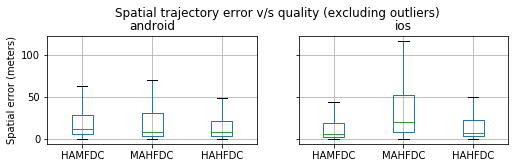

In [22]:
ifig, ax_array = plt.subplots(nrows=1,ncols=2,figsize=(8,2), sharey=True)

spatial_errors_df.query("phone_os == 'android' & quality > 0").boxplot(ax = ax_array[0], column=["error"], by=["quality"], showfliers=False)
ax_array[0].set_title('android')
spatial_errors_df.query("phone_os == 'ios' & quality > 0").boxplot(ax = ax_array[1], column=["error"], by=["quality"], showfliers=False)
ax_array[1].set_title("ios")

for i, ax in enumerate(ax_array):
    # print([t.get_text() for t in ax.get_xticklabels()])
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

ax_array[0].set_ylabel("Spatial error (meters)")
# ax_array[1][0].set_ylabel("Spatial error (meters)")
ifig.suptitle("Spatial trajectory error v/s quality (excluding outliers)", y = 1.1)
# ifig.tight_layout()

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5, 1.1, 'Spatial trajectory error v/s quality')

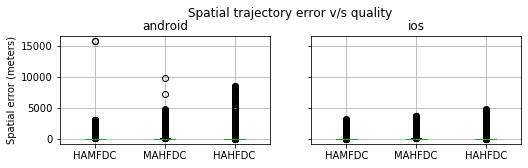

In [23]:
ifig, ax_array = plt.subplots(nrows=1,ncols=2,figsize=(8,2), sharey=True)

spatial_errors_df.query("phone_os == 'android' & quality > 0").boxplot(ax = ax_array[0], column=["error"], by=["quality"])
ax_array[0].set_title('android')
spatial_errors_df.query("phone_os == 'ios' & quality > 0").boxplot(ax = ax_array[1], column=["error"], by=["quality"])
ax_array[1].set_title("ios")

for i, ax in enumerate(ax_array):
    # print([t.get_text() for t in ax.get_xticklabels()])
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

ax_array[0].set_ylabel("Spatial error (meters)")
# ax_array[1][0].set_ylabel("Spatial error (meters)")
ifig.suptitle("Spatial trajectory error v/s quality", y = 1.1)
# ifig.tight_layout()

### Split out results by timeline

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .value

Text(0.5, 0.98, 'Spatial trajectory error v/s quality over multiple timelines')

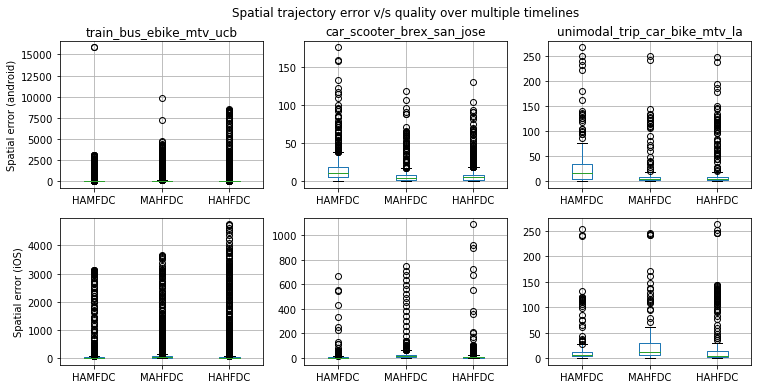

In [24]:
ifig, ax_array = plt.subplots(nrows=2,ncols=3,figsize=(12,6), sharex=False, sharey=False)
timeline_list = ["train_bus_ebike_mtv_ucb", "car_scooter_brex_san_jose", "unimodal_trip_car_bike_mtv_la"]
for i, tl in enumerate(timeline_list):
    spatial_errors_df.query("timeline == @tl & phone_os == 'android' & quality > 0").boxplot(ax = ax_array[0][i], column=["error"], by=["quality"])
    ax_array[0][i].set_title(tl)
    spatial_errors_df.query("timeline == @tl & phone_os == 'ios' & quality > 0").boxplot(ax = ax_array[1][i], column=["error"], by=["quality"])
    ax_array[1][i].set_title("")

for i, ax in enumerate(ax_array[0]):
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

for i, ax in enumerate(ax_array[1]):
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

ax_array[0][0].set_ylabel("Spatial error (android)")
ax_array[1][0].set_ylabel("Spatial error (iOS)")
ifig.suptitle("Spatial trajectory error v/s quality over multiple timelines")
# ifig.tight_layout()

### Split out results by section for the most complex timeline (train_bus_ebike_mtv_ucb)

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .value

[('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', ''), ('', '')]


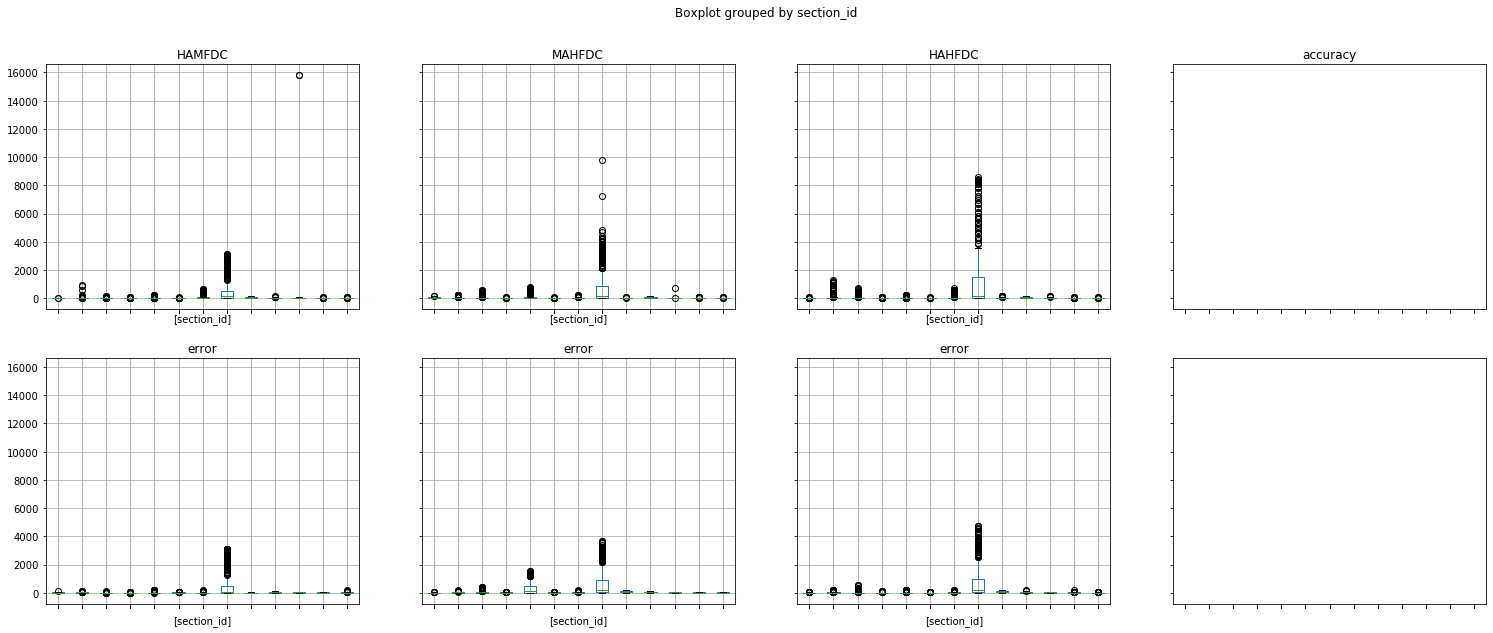

In [25]:
ifig, ax_array = plt.subplots(nrows=2,ncols=4,figsize=(25,10), sharex=True, sharey=True)
timeline_list = ["train_bus_ebike_mtv_ucb"]
for i, tl in enumerate(timeline_list):
    for q in range(1,5):
        sel_df = spatial_errors_df.query("timeline == @tl & phone_os == 'android' & quality == @q")
        if len(sel_df) > 0:
            sel_df.boxplot(ax = ax_array[2*i][q-1], column=["error"], by=["section_id"])
        ax_array[2*i][q-1].tick_params(axis="x", labelrotation=45)
        sel_df = spatial_errors_df.query("timeline == @tl & phone_os == 'ios' & quality == @q")
        if len(sel_df) > 0:
            sel_df.boxplot(ax = ax_array[2*i+1][q-1], column=["error"], by=["section_id"])
#        ax_array[i][].set_title("")

def make_acronym(s):
    ssl = s.split("_")
    # print("After splitting %s, we get %s" % (s, ssl))
    if len(ssl) == 0 or len(ssl[0]) == 0:
        return ""
    else:
        return "".join([ss[0] for ss in ssl])

for q in range(1,5):
    ax_array[0][q-1].set_title(q2r_map[q])
    curr_ticks = [t.get_text() for t in ax_array[1][q-1].get_xticklabels()]
    new_ticks = [make_acronym(t) for t in curr_ticks]
    ax_array[1][q-1].set_xticklabels(new_ticks)
    
print(list(zip(curr_ticks, new_ticks)))
# fig.text(0,0,"%s"% list(zip(curr_ticks, new_ticks)))

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .value

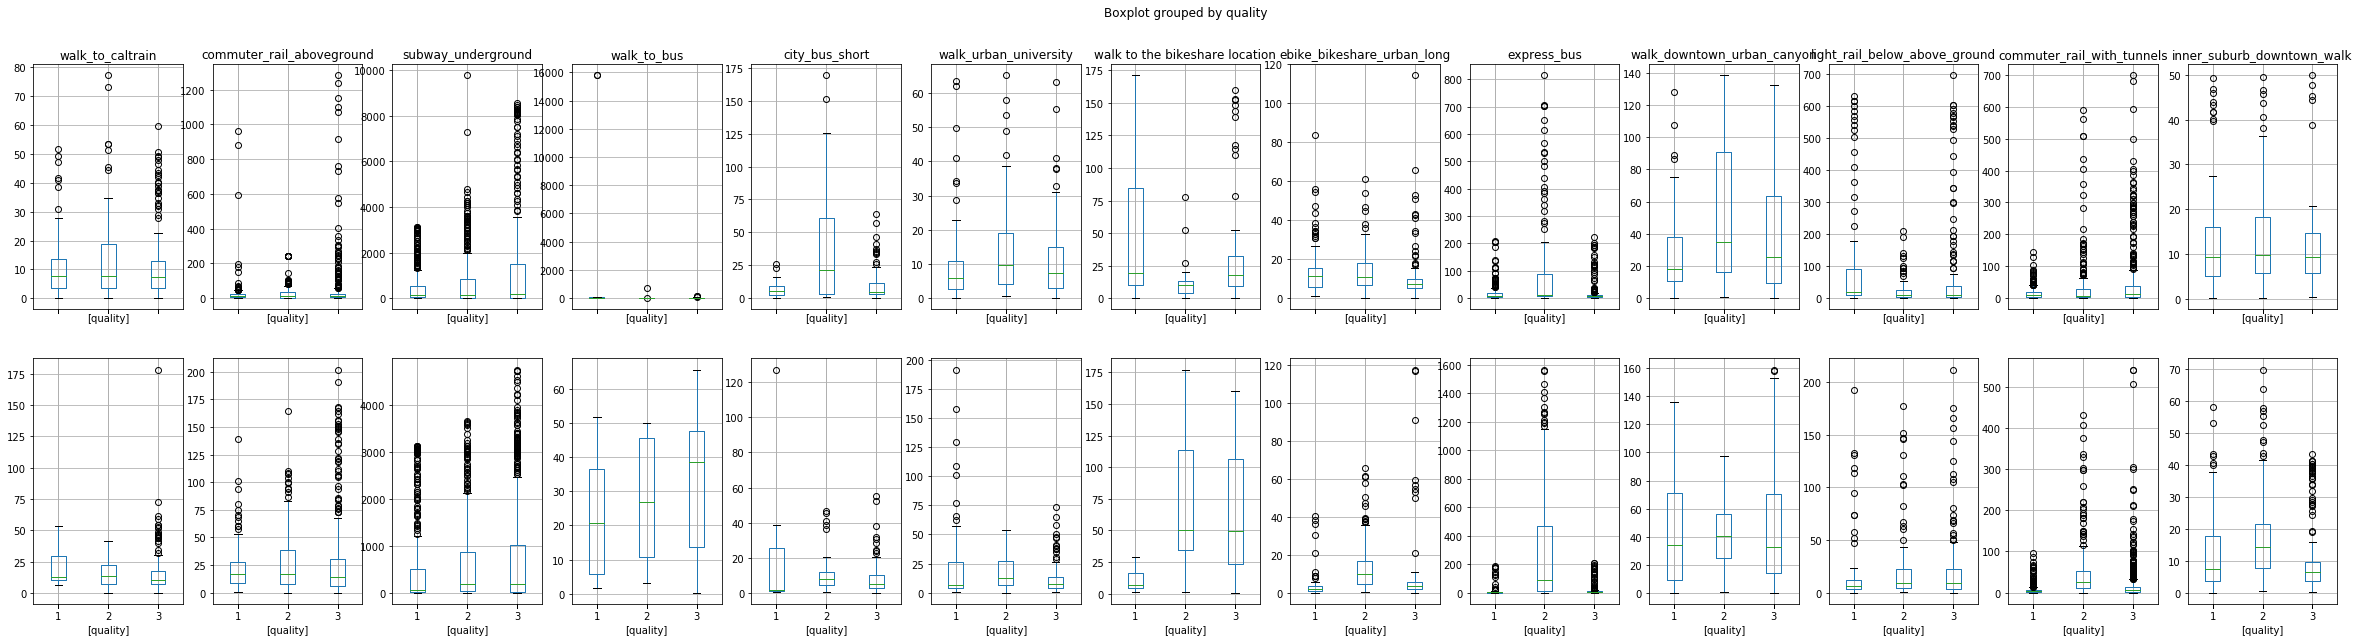

In [26]:
timeline_list = ["train_bus_ebike_mtv_ucb"]
for i, tl in enumerate(timeline_list):
    unique_sections = spatial_errors_df.query("timeline == @tl").section_id.unique()
    ifig, ax_array = plt.subplots(nrows=2,ncols=len(unique_sections),figsize=(40,10), sharex=True, sharey=False)
    for sid, s_name in enumerate(unique_sections):
        sel_df = spatial_errors_df.query("timeline == @tl & phone_os == 'android' & section_id == @s_name & quality > 0")
        if len(sel_df) > 0:
            sel_df.boxplot(ax = ax_array[2*i][sid], column=["error"], by=["quality"])
        ax_array[2*i][sid].set_title(s_name)
        sel_df = spatial_errors_df.query("timeline == @tl & phone_os == 'ios' & section_id == @s_name & quality > 0")
        if len(sel_df) > 0:
            sel_df.boxplot(ax = ax_array[2*i+1][sid], column=["error"], by=["quality"])
        ax_array[2*i+1][sid].set_title("")
#        ax_array[i][].set_title("")

### Focus only on sections where the max error is > 1000 meters

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


['1', '2', '3', '', '', '']
['1', '2', '3', '', '', '', '', '', '', '', '', '']


/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


['1', '2', '3', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['1', '2', '3', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


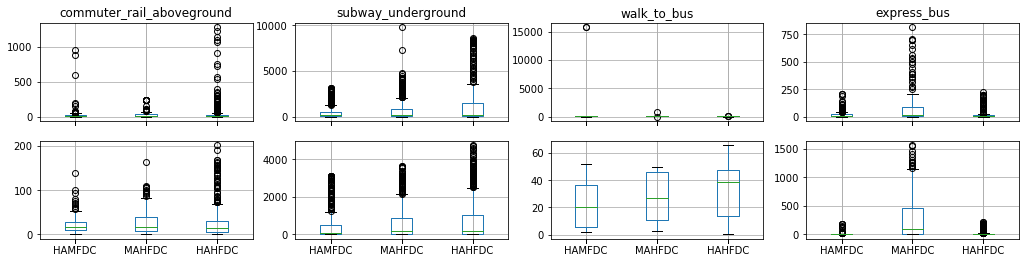

In [27]:
timeline_list = ["train_bus_ebike_mtv_ucb"]
for i, tl in enumerate(timeline_list):
    unique_sections = pd.Series(spatial_errors_df.query("timeline == @tl").section_id.unique())
    sections_with_outliers_mask = unique_sections.apply(lambda s_name: spatial_errors_df.query("timeline == 'train_bus_ebike_mtv_ucb' & section_id == @s_name").error.max() > 1000)
    sections_with_outliers = unique_sections[sections_with_outliers_mask]   
    ifig, ax_array = plt.subplots(nrows=2,ncols=len(sections_with_outliers),figsize=(17,4), sharex=True, sharey=False)
    for sid, s_name in enumerate(sections_with_outliers):
        sel_df = spatial_errors_df.query("timeline == @tl & phone_os == 'android' & section_id == @s_name & quality > 0")
        if len(sel_df) > 0:
            sel_df.boxplot(ax = ax_array[2*i][sid], column=["error"], by=["quality"])
        ax_array[2*i][sid].set_title(s_name)
        ax_array[2*i][sid].set_xlabel("")
        sel_df = spatial_errors_df.query("timeline == @tl & phone_os == 'ios' & section_id == @s_name & quality > 0")
        if len(sel_df) > 0:
            sel_df.boxplot(ax = ax_array[2*i+1][sid], column=["error"], by=["quality"])
        ax_array[2*i+1][sid].set_title("")
        print([t.get_text() for t in ax_array[2*i+1][sid].get_xticklabels()])
        ax_array[2*i+1][sid].set_xticklabels([q2r_map[int(t.get_text())] for t in ax_array[2*i+1][sid].get_xticklabels() if len(t.get_text()) > 0])
        ax_array[2*i+1][sid].set_xlabel("")
    ifig.suptitle("")

### Validation of outliers

#### (express bus iOS, MAHFDC)

ok, so it looks like the error is non-trivial across all runs, but run #1 is the worst and is responsible for the majority of the outliers. And this is borne out by the map, where on run #1, we end up with points in San Leandro!!

In [28]:
spatial_errors_df.query("phone_os == 'ios' & quality == 2 & section_id == 'express_bus' & error > 500").run.unique()

array([0, 1, 2])

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


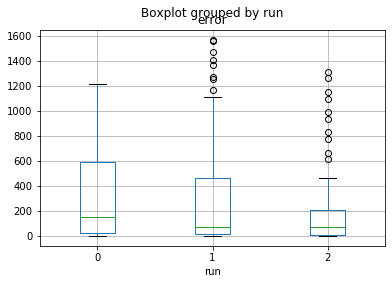

In [29]:
spatial_errors_df.query("phone_os == 'ios' & quality == 2 & section_id == 'express_bus'").boxplot(column="error", by="run")

In [30]:
gt_leg = sd_ucb.get_ground_truth_for_leg("berkeley_to_mtv_SF_express_bus", "express_bus"); print(gt_leg["id"])
curr_map = ezgj.get_map_for_geojson(sd_ucb.get_geojson_for_leg(gt_leg), name="ground_truth")
ezgj.get_fg_for_loc_df(emd.linestring_to_geo_df(eisd.SpecDetails.get_shapes_for_leg(gt_leg)["route"]),
                       name="gt_points", color="green").add_to(curr_map)

name_err_time = lambda lr: "%d: %d, %s, %s" % (lr["index"], lr["df_idx"], lr["error"], sd_ucb.fmt(lr["ts"], "MM-DD HH:mm:ss"))
error_df = emd.to_loc_df(spatial_errors_df.query("phone_os == 'ios' & quality == 2 & section_id == 'express_bus' & run == 1"))
gt_16k = lambda lr: lr["error"] == error_df.error.max()
folium.GeoJson(ezgj.get_geojson_for_loc_df(error_df, color="red"), name="sensed_values").add_to(curr_map)
ezgj.get_fg_for_loc_df(error_df, name="sensed_points", color="red", popupfn=name_err_time, stickyfn=gt_16k).add_to(curr_map)
folium.LayerControl().add_to(curr_map)
curr_map

express_bus


In [31]:
importlib.reload(ezgj)

<module 'emeval.viz.geojson' from '/Users/shankari/e-mission/e-mission-eval-public-data/emeval/viz/geojson.py'>

In [32]:
gt_leg = sd_ucb.get_ground_truth_for_leg("berkeley_to_mtv_SF_express_bus", "express_bus"); print(gt_leg["id"])
curr_map = ezgj.get_map_for_geojson(sd_ucb.get_geojson_for_leg(gt_leg), name="ground_truth")
ezgj.get_fg_for_loc_df(emd.linestring_to_geo_df(eisd.SpecDetails.get_shapes_for_leg(gt_leg)["route"]),
                       name="gt_points", color="green").add_to(curr_map)

name_err_time = lambda lr: "%d: %d, %s, %s" % (lr["index"], lr["df_idx"], lr["error"], sd_ucb.fmt(lr["ts"], "MM-DD HH:mm:ss"))

colors = ["red", "yellow", "blue"]
for run in range(3):
    error_df = emd.to_loc_df(spatial_errors_df.query("phone_os == 'ios' & quality == 2 & section_id == 'express_bus' & run == @run"))
    gt_16k = lambda lr: lr["error"] == error_df.error.max()
    print("max error for run %d is %s" % (run, error_df.error.max()))
    folium.GeoJson(ezgj.get_geojson_for_loc_df(error_df, color=colors[run]), name="sensed_values").add_to(curr_map)
    ezgj.get_fg_for_loc_df(error_df, name="sensed_points", color=colors[run], popupfn=name_err_time, stickyfn=gt_16k).add_to(curr_map)

folium.LayerControl().add_to(curr_map)
curr_map

express_bus
max error for run 0 is 1209.2261013331863
max error for run 1 is 1567.1580101599525
max error for run 2 is 1305.3713336168273


#### (commuter rail aboveground android, HAMFDC)

Run 0: Multiple outliers at the start in San Jose. After that, everything is fine.

In [33]:
spatial_errors_df.query("phone_os == 'android' & quality == 1 & section_id == 'commuter_rail_aboveground' & error > 500").run.unique()

array([0])

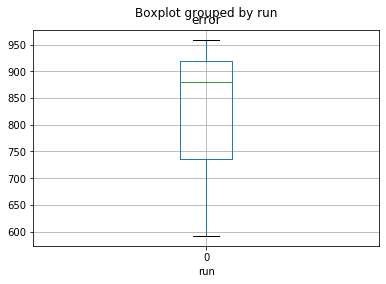

In [34]:
spatial_errors_df.query("phone_os == 'android' & quality == 1 & section_id == 'commuter_rail_aboveground' & error > 500").boxplot(column="error", by="run")

In [35]:
gt_leg = sd_ucb.get_ground_truth_for_leg("mtv_to_berkeley_sf_bart", "commuter_rail_aboveground"); print(gt_leg["id"])
curr_map = ezgj.get_map_for_geojson(sd_ucb.get_geojson_for_leg(gt_leg), name="ground_truth")
ezgj.get_fg_for_loc_df(emd.linestring_to_geo_df(eisd.SpecDetails.get_shapes_for_leg(gt_leg)["route"]),
                       name="gt_points", color="green").add_to(curr_map)

name_err_time = lambda lr: "%d: %d, %s, %s" % (lr["index"], lr["df_idx"], lr["error"], sd_ucb.fmt(lr["ts"], "MM-DD HH:mm:ss"))

error_df = emd.to_loc_df(spatial_errors_df.query("phone_os == 'android' & quality == 1 & section_id == 'commuter_rail_aboveground' & run == 0"))
maxes = [error_df.error.max(), error_df[error_df.error < 10000].error.max(), error_df[error_df.error < 1000].error.max()]
gt_16k = lambda lr: lr["error"] in maxes
folium.GeoJson(ezgj.get_geojson_for_loc_df(error_df, color="red"), name="sensed_values").add_to(curr_map)
ezgj.get_fg_for_loc_df(error_df, name="sensed_points", color="red", popupfn=name_err_time, stickyfn=gt_16k).add_to(curr_map)

folium.LayerControl().add_to(curr_map)
curr_map

commuter_rail_aboveground


In [36]:
spatial_errors_df.query("phone_os == 'android' & quality == 1 & section_id == 'commuter_rail_aboveground' & error > 10000")

Empty GeoDataFrame
Columns: [error, geometry, phone_label, phone_os, role, run, section_id, timeline, trip_id, ts, quality, label]
Index: []

#### (walk_to_bus android, HAMFDC, HAHFDC)

Huge zig zag when we get out of the BART station

In [37]:
spatial_errors_df.query("phone_os == 'android' & (quality == 1 | quality == 3) & section_id == 'walk_to_bus' & error > 500").run.unique()

array([1])

In [38]:
spatial_errors_df.query("phone_os == 'android' & (quality == 1 | quality == 3) & section_id == 'walk_to_bus' & error > 500")

error                        geometry        phone_label  \
1304  15817.844694  POINT (-122.392876 37.7679833)  ucb-sdb-android-3   
1305  15817.844694  POINT (-122.392876 37.7679833)  ucb-sdb-android-3   

     phone_os    role  run   section_id                 timeline  \
1304  android  HAMFDC    1  walk_to_bus  train_bus_ebike_mtv_ucb   
1305  android  HAMFDC    1  walk_to_bus  train_bus_ebike_mtv_ucb   

                      trip_id            ts  quality   label  
1304  mtv_to_berkeley_sf_bart  1.564075e+09        1  HAMFDC  
1305  mtv_to_berkeley_sf_bart  1.564075e+09        1  HAMFDC

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


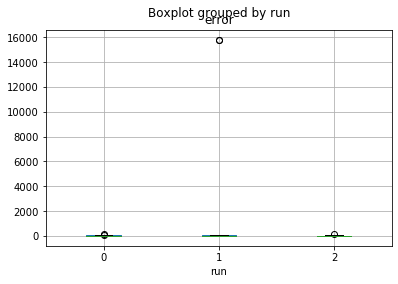

In [39]:
spatial_errors_df.query("phone_os == 'android' & (quality == 1 | quality == 3) & section_id == 'walk_to_bus'").boxplot(column="error", by="run")

In [40]:
spatial_errors_df.query("phone_os == 'android' & (quality == 1 | quality == 3) & section_id == 'walk_to_bus'").error.max()

15817.844694468224

In [41]:
error_df

error                                      geometry  \
461  591.810639  POINT (-122.0710153631288 37.39212142485887)   
462  879.608684  POINT (-122.0681506446931 37.39089313728831)   
463  959.243610  POINT (-122.0673593683709 37.39055148113606)   
464   13.737848  POINT (-122.0807596231468 37.39622563503848)   
465    7.062699  POINT (-122.0881505103539 37.39936192402326)   
466    5.061934  POINT (-122.0961141868245 37.40250071814091)   
467   14.513945  POINT (-122.1030915222043 37.40536635715434)   
468    0.635129  POINT (-122.1070753793472 37.40734385715434)   
469   21.995494  POINT (-122.1080782102765 37.40771524879843)   
470   19.785327  POINT (-122.1080874304573 37.40774654502165)   
471   10.079959   POINT (-122.107986675094 37.40779439822227)   
472   17.559422  POINT (-122.1089870274233 37.40874606748931)   
473    5.327219               POINT (-122.1118006 37.4102582)   
474   21.908812  POINT (-122.1171058663218 37.41392370475671)   
475   11.647680  POINT (-122.1235095038537 37.41784938499574)   
476   28.104077   POINT (-122.131266921509 37.42293579915056)   
477   12.012930   POINT (-122.1362626586766 37.4259008031426)   
478    8.206911   POINT (-122.1410559586765 37.4286871531426)   
479   23.328823   POINT (-122.141600104963 37.42885574420819)   
480   35.634400               POINT (-122.1416298 37.4287327)   
481   35.634400               POINT (-122.1416298 37.4287327)   
482   11.246684  POINT (-122.1420077744033 37.42925489695782)   
483    3.636555               POINT (-122.1434133 37.4302287)   
484   10.040759  POINT (-122.1477164602303 37.43286842741109)   
485    5.117095  POINT (-122.1529608223715 37.43622901457825)   
486    5.191628  POINT (-122.1591911661215 37.44026551457825)   
487   15.983801  POINT (-122.1636429240027 37.44298619446167)   
488   14.985152  POINT (-122.1649153056763 37.44377604337769)   
489   13.007627  POINT (-122.1649179409045 37.44375499308716)   
490   13.097773  POINT (-122.1649166139917 37.44375519300415)   
..          ...                                           ...   
514   15.465720  POINT (-122.2394860838148 37.49072299215508)   
515   21.041365  POINT (-122.2448693678528 37.49436825359803)   
516    6.731391   POINT (-122.2503560491669 37.4993273230133)   
517    7.623152  POINT (-122.2567747593791 37.50493967402242)   
518   13.565630  POINT (-122.2637430834757 37.51092928671061)   
519    1.372811   POINT (-122.2715575650971 37.5174206544983)   
520   16.771664   POINT (-122.2796499221435 37.5238881960612)   
521    7.041166  POINT (-122.2878961262711 37.52999457620764)   
522   14.490329  POINT (-122.2952217826078 37.53538223993734)   
523   38.436648  POINT (-122.2982168352804 37.53824425826866)   
524   23.885876  POINT (-122.2987256696819 37.53901679860053)   
525   35.109366  POINT (-122.2982770907345 37.53942835123211)   
526   29.362803  POINT (-122.2983295551695 37.53939773453999)   
527    5.636761  POINT (-122.2985156991813 37.53923836326967)   
528    6.415014  POINT (-122.2985190985634 37.53925384497976)   
529   16.310104  POINT (-122.2984557235634 37.53933582935476)   
530   18.928248  POINT (-122.2992191772561 37.54020780254487)   
531   13.164019               POINT (-122.3002963 37.5413493)   
532    8.787084  POINT (-122.3046053259147 37.54635436062726)   
533   17.217337  POINT (-122.3087358513127 37.55198722715125)   
534   71.195700  POINT (-122.3142166991224 37.55841135438124)   
535   54.019021  POINT (-122.3209212657891 37.56471708771458)   
536   44.396772   POINT (-122.3276258324557 37.5710228210479)   
537   46.005415  POINT (-122.3348668198128 37.57544863987151)   
538   15.162924  POINT (-122.3461519874321 37.58052666570337)   
539    3.120588  POINT (-122.3550558496433 37.58437555917467)   
540    0.532330   POINT (-122.367146743759 37.58947707849911)   
541    7.938648  POINT (-122.3766717939211 37.59341321869071)   
542    0.228025  POINT (-122.3836466737885 37.59687853407986)   
543   84.538086   POINT (-122.386845510835 37

In [42]:
ucb_and_back = pv_ucb.map()["android"]["ucb-sdb-android-2"]["evaluation_ranges"][0]; ucb_and_back["trip_id"]
to_trip = ucb_and_back["evaluation_trip_ranges"][0]; print(to_trip["trip_id"])
wb_leg = to_trip["evaluation_section_ranges"][6]; print(wb_leg["trip_id"])
gt_leg = sd_ucb.get_ground_truth_for_leg(to_trip["trip_id_base"], wb_leg["trip_id_base"]); gt_leg["id"]

mtv_to_berkeley_sf_bart_0
walk_to_bus_0


'walk_to_bus'

In [43]:
importlib.reload(ezgj)

<module 'emeval.viz.geojson' from '/Users/shankari/e-mission/e-mission-eval-public-data/emeval/viz/geojson.py'>

In [44]:
gt_leg = sd_ucb.get_ground_truth_for_leg("mtv_to_berkeley_sf_bart", "walk_to_bus"); print(gt_leg["id"])
curr_map = ezgj.get_map_for_geojson(sd_ucb.get_geojson_for_leg(gt_leg), name="ground_truth")
ezgj.get_fg_for_loc_df(emd.linestring_to_geo_df(eisd.SpecDetails.get_shapes_for_leg(gt_leg)["route"]),
                       name="gt_points", color="green").add_to(curr_map)

name_err_time = lambda lr: "%d: %d, %s, %s" % (lr["index"], lr["df_idx"], lr["error"], sd_ucb.fmt(lr["ts"], "MM-DD HH:mm:ss"))

error_df = emd.to_loc_df(spatial_errors_df.query("phone_os == 'android' & quality == 1 & section_id == 'walk_to_bus'").sort_index(axis="index"))
maxes = [error_df.error.max(), error_df[error_df.error < 16000].error.max(), error_df[error_df.error < 5000].error.max()]
gt_16k = lambda lr: lr["error"] in maxes
print("Checking errors %s" % maxes)
folium.GeoJson(ezgj.get_geojson_for_loc_df(error_df, color="red"), name="sensed_values").add_to(curr_map)
ezgj.get_fg_for_loc_df(error_df, name="sensed_points", color="red", popupfn=name_err_time, stickyfn=gt_16k).add_to(curr_map)

folium.LayerControl().add_to(curr_map)
curr_map

walk_to_bus
Checking errors [15817.844694468224, 15817.844694468224, 59.14272402953301]


#### (light_rail_below_above_ground, android, accuracy_control)

ok, so it looks like the error is non-trivial across all runs, but run #1 is the worst and is responsible for the majority of the outliers. And this is borne out by the map, where on run #1, we end up with points in San Leandro!!

In [45]:
spatial_errors_df.query("phone_os == 'android' & quality == 4 & section_id == 'light_rail_below_above_ground' & error > 100").run.unique()

array([], dtype=int64)

In [46]:
# spatial_errors_df.query("phone_os == 'android' & (quality == 4) & section_id == 'light_rail_below_above_ground'").boxplot(column="error", by="run")

In [47]:
ucb_and_back = pv_ucb.map()["android"]["ucb-sdb-android-2"]["evaluation_ranges"][0]; ucb_and_back["trip_id"]
back_trip = ucb_and_back["evaluation_trip_ranges"][2]; print(back_trip["trip_id"])
lt_leg = back_trip["evaluation_section_ranges"][7]; print(lt_leg["trip_id"])
gt_leg = sd_ucb.get_ground_truth_for_leg(back_trip["trip_id_base"], lt_leg["trip_id_base"]); gt_leg["id"]

berkeley_to_mtv_SF_express_bus_0
light_rail_below_above_ground_0


'light_rail_below_above_ground'

In [48]:
import folium

In [49]:
gt_leg = sd_ucb.get_ground_truth_for_leg("berkeley_to_mtv_SF_express_bus", "light_rail_below_above_ground"); print(gt_leg["id"])
curr_map = ezgj.get_map_for_geojson(sd_ucb.get_geojson_for_leg(gt_leg), name="ground_truth")
ezgj.get_fg_for_loc_df(emd.linestring_to_geo_df(eisd.SpecDetails.get_shapes_for_leg(gt_leg)["route"]),
                       name="gt_points", color="green").add_to(curr_map)

name_err_time = lambda lr: "%d: %d, %s, %s" % (lr["index"], lr["df_idx"], lr["error"], sd_ucb.fmt(lr["ts"], "MM-DD HH:mm:ss"))

colors = ["red", "yellow", "blue"]
for run in range(3):
    error_df = emd.to_loc_df(spatial_errors_df.query("phone_os == 'android' & quality == 2 & section_id == 'light_rail_below_above_ground' & run == @run"))
    gt_16k = lambda lr: lr["error"] == error_df.error.max()
    print("max error for run %d is %s" % (run, error_df.error.max()))
    folium.GeoJson(ezgj.get_geojson_for_loc_df(error_df, color=colors[run]), name="sensed_values").add_to(curr_map)
    ezgj.get_fg_for_loc_df(error_df, name="sensed_points", color=colors[run], popupfn=name_err_time, stickyfn=gt_16k).add_to(curr_map)

folium.LayerControl().add_to(curr_map)
curr_map

light_rail_below_above_ground
max error for run 0 is 211.188888218956
max error for run 1 is 99.97294835442949
max error for run 2 is 191.83029074503196


In [50]:
spatial_errors_df.query("phone_os == 'android' & quality == 2 & section_id == 'light_rail_below_above_ground' & run == @run")

error                                      geometry  \
5437   94.072857  POINT (-122.3955165862883 37.79272362113074)   
5438  191.830291  POINT (-122.3941480725766 37.79249584226148)   
5439  124.422353   POINT (-122.392779558865 37.79226806339223)   
5440   40.629781  POINT (-122.3914110451533 37.79204028452297)   
5441  140.712608  POINT (-122.3922869103217 37.79126656436911)   
5442   86.279097  POINT (-122.3897003699822 37.79170260234818)   
5443   19.794046               POINT (-122.3903719 37.7908069)   
5444   29.237176   POINT (-122.3898654331758 37.7902651292696)   
5445   22.812602  POINT (-122.3891567663996 37.78978498122824)   
5446   48.121744  POINT (-122.3875671530619 37.78890418593576)   
5447    3.815901   POINT (-122.3878797228957 37.7868064490529)   
5448   40.195226  POINT (-122.3885641356737 37.78449897223098)   
5449    9.998809   POINT (-122.388260037813 37.78401277698527)   
5450   27.948300   POINT (-122.388610764299 37.78216686358176)   
5451   30.409097  POINT (-122.3892112855005 37.78057486454087)   
5452   17.133679  POINT (-122.3900106248089 37.77932766864368)   
5453    7.922955  POINT (-122.3900262429063 37.77963316750009)   
5454    2.940973  POINT (-122.3919441577391 37.77806539660964)   
5455   14.977502  POINT (-122.3925054735812 37.77741313113773)   
5456    1.598498  POINT (-122.3928242539044 37.77737293972531)   
5457    0.509708  POINT (-122.3932138479094 37.77705629415707)   
5458    2.644773  POINT (-122.3938278549344 37.77659902410613)   
5459   53.007063  POINT (-122.3941528013221 37.77593155718511)   

            phone_label phone_os    role  run                     section_id  \
5437  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5438  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5439  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5440  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5441  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5442  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5443  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5444  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5445  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5446  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5447  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5448  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5449  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5450  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5451  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5452  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5453  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5454  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5455  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5456  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5457  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5458  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   
5459  ucb-sdb-android-3  android  MAHFDC    2  light_rail_below_above_ground   

                     timeline                         trip_id            ts  \
5437  train_bus_ebike_mtv_ucb  berkeley_to_mtv_SF_express_bus  1.568767e+09   
5438  train_bus_ebike_mtv_ucb  berkeley_to_mtv_SF_express_bus  1.568767e+09   
5439  train_bus_ebike_mtv_ucb  berkeley_to_mtv_SF_express_bus  1.568767e+09   
5440  train_bus_ebike_mtv_ucb  berkeley_to_mtv_SF_express_bus  1.568767e+09   
5441  train_bus_ebike_mtv_ucb  berkeley_to_mtv_SF_express_bus  1.568767e+09   
5442  train_bus_ebike_mtv_ucb  

#### (subway, android, HAMFDC)

This is the poster child for temporal accuracy tracking

In [51]:
spatial_errors_df.query("phone_os == 'android' & (quality == 1 | quality == 3) & section_id == 'subway_underground' & error > 8000")

error                                      geometry  \
4749  8080.514766  POINT (-122.3473534442319 37.68868546589741)   
4750  8373.351289  POINT (-122.3460032974812 37.69176750610077)   
4751  8577.161461  POINT (-122.3446531507306 37.69484954630413)   
4752  8481.163685    POINT (-122.34330300398 37.69793158650749)   
4753  8399.650356  POINT (-122.3419528572294 37.70101362671085)   
4754  8326.004535  POINT (-122.3406027104787 37.70409566691421)   
4755  8265.073633  POINT (-122.3392525637281 37.70717770711757)   
4756  8214.398703  POINT (-122.3379024169775 37.71025974732093)   
4757  8163.968860  POINT (-122.3365522702269 37.71334178752429)   
4758  8115.718369  POINT (-122.3352021234763 37.71642382772764)   
4759  8082.326846    POINT (-122.3338519767256 37.719505867931)   
4760  8064.609278   POINT (-122.332501829975 37.72258790813436)   
4761  8062.886636  POINT (-122.3311516832244 37.72566994833772)   
4762  8077.105896  POINT (-122.3298015364738 37.72875198854108)   
4763  8107.475334  POINT (-122.3284513897231 37.73183402874444)   
4764  8153.814311   POINT (-122.3271012429725 37.7349160689478)   

            phone_label phone_os    role  run          section_id  \
4749  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4750  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4751  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4752  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4753  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4754  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4755  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4756  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4757  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4758  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4759  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4760  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4761  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4762  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4763  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
4764  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   

                     timeline                  trip_id            ts  quality  \
4749  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568738e+09        3   
4750  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568738e+09        3   
4751  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568738e+09        3   
4752  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568738e+09        3   
4753  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568738e+09        3   
4754  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568738e+09        3   
4755  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568738e+09        3   
4756  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568739e+09        3   
4757  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568739e+09        3   
4758  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568739e+09        3   
4759  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568739e+09        3   
4760  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568739e+09        3   
4761  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568739e+09        3   
4762  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568739e+09        3   
4763  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568739e+09        3   
4764  train_bus_ebike_mtv_ucb  mtv_to_berkeley_sf_bart  1.568739e+09        3   

       label  
4749  HAHFDC  
4750  HAHFDC  
4751  HAHFDC  
4752  HAHFDC  
4753  HAHFDC  
4754  HAHFDC  
4755  HAHFDC  
4756  HAHFDC  
4757  HAHFDC  
4758  HAHFDC  
4759  HAHFDC  
4760  HAHFDC  
4761  HAHFDC  
4762  HAHFDC  
4763  HAHFDC  
4764  HAHFDC

In [52]:
bart_leg = pv_ucb.map()["android"]["ucb-sdb-android-3"]["evaluation_ranges"][0]["evaluation_trip_ranges"][0]["evaluation_section_ranges"][5]
gt_leg = sd_ucb.get_ground_truth_for_leg("mtv_to_berkeley_sf_bart", "subway_underground"); gt_leg["id"]

'subway_underground'

In [53]:
gt_leg = sd_ucb.get_ground_truth_for_leg("mtv_to_berkeley_sf_bart", "subway_underground"); print(gt_leg["id"])
curr_map = ezgj.get_map_for_geojson(sd_ucb.get_geojson_for_leg(gt_leg), name="ground_truth")
ezgj.get_fg_for_loc_df(emd.linestring_to_geo_df(eisd.SpecDetails.get_shapes_for_leg(gt_leg)["route"]),
                       name="gt_points", color="green").add_to(curr_map)

name_err_time = lambda lr: "%d: %d, %s, %s" % (lr["index"], lr["df_idx"], lr["error"], sd_ucb.fmt(lr["ts"], "MM-DD HH:mm:ss"))

error_df = emd.to_loc_df(spatial_errors_df.query("phone_os == 'android' & quality == 3 & section_id == 'subway_underground' & run == 2").sort_index(axis="index"))
maxes = [error_df.error.max(), error_df[error_df.error < 16000].error.max(), error_df[error_df.error < 5000].error.max()]
gt_16k = lambda lr: lr["error"] in maxes
print("Checking errors %s" % maxes)
folium.GeoJson(ezgj.get_geojson_for_loc_df(error_df, color="red"), name="sensed_values").add_to(curr_map)
ezgj.get_fg_for_loc_df(error_df, name="sensed_points", color="red", popupfn=name_err_time, stickyfn=gt_16k).add_to(curr_map)

folium.LayerControl().add_to(curr_map)
curr_map


subway_underground
Checking errors [8577.161460713716, 8577.161460713716, 4969.039128046561]


In [54]:
gt_leg = sd_ucb.get_ground_truth_for_leg("mtv_to_berkeley_sf_bart", "subway_underground"); gt_leg["id"]
eisd.SpecDetails.get_shapes_for_leg(gt_leg)["route"].is_simple

False

In [55]:
pd.concat([
    error_df.iloc[40:50],
    error_df.iloc[55:60],
    error_df.iloc[65:75],
    error_df.iloc[70:75]])

error                                      geometry  \
1785    42.143359   POINT (-122.430782408491 37.73552731473472)   
1786    33.580357   POINT (-122.427254975438 37.73773414150547)   
1787     1.094692   POINT (-122.423727542385 37.73994096827622)   
1788   146.541911  POINT (-122.4202001093319 37.74214779504698)   
1789   311.381538  POINT (-122.4166726762789 37.74435462181772)   
1790   477.685840  POINT (-122.4131452432258 37.74656144858847)   
1791   744.169838  POINT (-122.4096178101728 37.74876827535923)   
1792  1071.706715  POINT (-122.4060903771198 37.75097510212998)   
1793  1400.136010  POINT (-122.4025629440667 37.75318192890072)   
1794  1728.506681  POINT (-122.3990355110137 37.75538875567148)   
1800  3079.314157  POINT (-122.3778709126954 37.76862971629598)   
1801  3124.981186  POINT (-122.3743434796424 37.77083654306674)   
1802  3104.196200  POINT (-122.3708160465894 37.77304336983748)   
1803  3041.496194  POINT (-122.3672886135363 37.77525019660823)   
1804  2978.776727  POINT (-122.3637611804833 37.77745702337899)   
1810  1950.446302   POINT (-122.342596582165 37.79069798400349)   
1811  1776.647378   POINT (-122.339069149112 37.79290481077424)   
1812  1596.252146   POINT (-122.335541716059 37.79511163754499)   
1813  1384.397973  POINT (-122.3320142830059 37.79731846431574)   
1814  1140.169118   POINT (-122.3284868499529 37.7995252910865)   
1815   865.165016  POINT (-122.3249594168998 37.80173211785724)   
1816   586.350803  POINT (-122.3214319838468 37.80393894462799)   
1817   307.526744  POINT (-122.3179045507938 37.80614577139875)   
1818    27.342847   POINT (-122.3143771177407 37.8083525981695)   
1819     4.473845  POINT (-122.3064122414635 37.80780203990253)   
1815   865.165016  POINT (-122.3249594168998 37.80173211785724)   
1816   586.350803  POINT (-122.3214319838468 37.80393894462799)   
1817   307.526744  POINT (-122.3179045507938 37.80614577139875)   
1818    27.342847   POINT (-122.3143771177407 37.8083525981695)   
1819     4.473845  POINT (-122.3064122414635 37.80780203990253)   

            phone_label phone_os    role  run          section_id  \
1785  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1786  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1787  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1788  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1789  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1790  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1791  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1792  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1793  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1794  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1800  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1801  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1802  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1803  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1804  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1810  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1811  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1812  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1813  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1814  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1815  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1816  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1817  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1818  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1819  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1815  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
1816  ucb-sdb-android-2  android  HAHFDC    2  subway_underground   
18

In [56]:
import pyproj

In [57]:
latlonProj = pyproj.Proj(init="epsg:4326")
xyProj = pyproj.Proj(init="epsg:3395")

In [58]:
xy = pyproj.transform(latlonProj, xyProj, -122.08355963230133, 37.39091642895306); xy

(-13590279.692498034, 4467786.952141141)

In [59]:
pyproj.transform(xyProj, latlonProj, xy[0], xy[1])

(-122.08355963230133, 37.390916428952806)

In [60]:
import pandas as pd

In [61]:
df = pd.DataFrame({"a": [1,2,3], "b": [4,5,6]}); df

a  b
0  1  4
1  2  5
2  3  6

In [62]:
pd.concat([pd.DataFrame([{"a": 10, "b": 14}]), df, pd.DataFrame([{"a": 20, "b": 24}])], axis='index').reset_index(drop=True)

a   b
0  10  14
1   1   4
2   2   5
3   3   6
4  20  24